## Regresión Lineal Múltiple

La regresión lineal simple es un método útil para predecir una respuesta sobre la base de una sola variable predictora. Sin embargo, en la práctica frecuentemente se tiene más de un predictor. Por ejemplo, en los datos de Publicidad, se examinó la relación entre las ventas y la publicidad televisiva. También tenemos datos de la cantidad de dinero gastado en la publicidad en la radio y en los periódicos, y es posible que desee saber si cualquiera de estos otros dos medios de publicidad se asocia con las ventas. **¿Cómo podemos ampliar nuestro análisis de los datos publicitarios para acomodar estos dos predictores adicionales?**

Una opción es ejecutar tres regresiones lineales sencillas separadas, cada una de las cuales utiliza un medio publicitario diferente como predictor. Por ejemplo, podemos establecer una regresión lineal simple para predecir las ventas sobre la base de la cantidad gastada en anuncios de radio. Los resultados se muestran en la siguientes tablas:

In [3]:
# Importamos las librearias necesarias para manipular los datos
import pandas as pd # Librería que permite alamacenar los datos en tablas o dataframes como en R
import matplotlib.pyplot as plt # Librería para graficar
# Esta línea permite que aparezcan los graficos directamente en el notebook
%matplotlib inline

# Leemos los datos de un archivo en formato CSV y lo almacenamos en un DataFrame de la librearía Pandas
# El archivo puede ser leido directamente de un URL en internet o localmente una vez sea descargado.
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head() # Lista los primeros datos de la tabla o dataframe

# Esta es una forma estandar de importar la librería si se quiere utilizar la notación similar que en R
import statsmodels.formula.api as smf

# Creamos el modelo y lo ajustamos en una sola línea de código
# OLS es la función de Ordinary Least Squeares por sus siglas en ingles del metodo de ajuste por minimos cuadrados 
lm = smf.ols(formula='sales ~ TV', data=data).fit()
lm.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [4]:
# Modelo para Radio
estRadio = smf.ols('sales ~ radio', data).fit()
estRadio.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.3116,0.563,16.542,0.000,8.202,10.422
radio,0.2025,0.020,9.921,0.000,0.162,0.243


In [5]:
# Modelo para Periódico
estNP = smf.ols('sales ~ newspaper', data).fit()
estNP.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.3514,0.621,19.876,0.000,11.126,13.577
newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


In [6]:
print("Cantidad de unidades vendidas - Radio: ",estRadio.params[1]*1000)
print("Cantidad de unidades vendidas - Periódico: ",estNP.params[1]*1000)

Cantidad de unidades vendidas - Radio:  202.495783392
Cantidad de unidades vendidas - Periódico:  54.6930984723


Encontramos que un aumento de 1,000 dolares en el gasto en publicidad de radio se asocia con un aumento en ventas de alrededor de 203 unidades. La tabla de resultados anterior contiene los coeficientes de mínimos cuadrados para una simple regresión lineal de las ventas en el presupuesto de publicidad en los periódicos. Un aumento de $1,000 en el presupuesto de publicidad en los periódicos se asocia con un aumento en las ventas de aproximadamente 55 unidades.

Sin embargo, **el enfoque de ajustar un modelo de regresión lineal simple por separado para cada predictor no es del todo satisfactorio**. En primer lugar, no está claro cómo hacer una sola predicción de las ventas dados los niveles de los tres presupuestos de medios de publicidad, ya que cada uno de los presupuestos se asocia con una ecuación de regresión por separado. En segundo lugar, _cada una de las tres ecuaciones de regresión ignora los otros dos medios al obtener estimaciones para los coeficientes de regresión_. _**Más adelante se verá que si los presupuestos de los medios de publicidad están correlacionados entre sí en los 200 mercados que constituyen nuestro conjunto de datos, entonces podemos llegar a estimaciones muy engañosas de los efectos individuales de los medios sobre las ventas.**_

En lugar de ajustar un modelo de regresión lineal simple por separado para cada predictor, una mejor aproximación es extender el modelo de regresión lineal simple para que pueda utilizar directamente múltiples predictores. Podemos hacer esto dando a cada predictor un coeficiente de pendiente separado en un solo modelo. En general, supongamos que tenemos p predictores distintos. Entonces el modelo de regresión lineal múltiple toma la forma:

$$y = \beta_0 + \beta_1x_1 + + \beta_2x_2 +... + \beta_px_p + \epsilon$$

Donde $X_j$ representa la j-ésima predictora y $B_j$ cuantifica la asociación entre esa variable y la respuesta. Interpretamos $B_j$ como el efecto promedio sobre $Y$ de un aumento de una unidad en $X_j$, manteniendo fijos todos los demás predictores. En el ejemplo de publicidad, el modelo sería:

$$y = \beta_0 + \beta_1 \times TV + \beta_2 \times radio + \beta_3 \times newspaper + \epsilon$$



In [68]:
# Cuales son los valores min/max de las variables?
# Estos valores se pueden utilizar mas adelante para uno de los graficos en 3D
data[['radio', 'TV', 'newspaper']].describe()

,radio,TV,newspaper
count,200.000000,200.000000,200.000000
mean,23.264000,147.042500,30.554000
std,14.846809,85.854236,21.778621
min,0.000000,0.700000,0.300000
25%,9.975000,74.375000,12.750000
50%,22.900000,149.750000,25.750000
75%,36.525000,218.825000,45.100000
max,49.600000,296.400000,114.000000


### Estimación de los Coeficientes de Regresión

In [12]:
# Creamos un modelo con todos los predictores
lm2 = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()
# Visualizamos los coeficientes
lm2.params

Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64

**Como interpretamos estos coeficientes?**
Para un aumento en gastos de publicidad dado en Radio y Prensa, y un incremento en publicidad de $1000 en TV esta asociado con un incremento en ventas de 46 unidades.

Mayor información puede ser revisada en el resumen del modelo, que se presenta a continuación:

In [56]:
# resumen del modelo ajustado
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 22 Oct 2017   Prob (F-statistic):           1.58e-96
Time:                        11:11:31   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

La tabla muestra las estimaciones de los coeficientes de la regresión múltiple cuando se usan presupuestos para publicidad en televisión, radio y periódicos para predecir las ventas de productos, usando los datos de Publicidad. Interpretamos estos resultados de la siguiente manera: para una cantidad fija (dada) de publicidad en TV y periódicos, un gasto adicional de $1,000 en publicidad por radio produce un aumento en las ventas de aproximadamente 189 unidades.

Al comparar estas estimaciones de coeficientes con las mostradas en las ortas tablas anteriores, observamos que las estimaciones de los coeficientes de regresión múltiple para TV y radio son bastante similares a las estimaciones del coeficiente de regresión lineal simple. Sin embargo, mientras que la estimación del coeficiente de regresión del gasto en publicidad en periódicos era significativamente diferente de cero, su estimación en el modelo de regresión múltiple es cercana a cero, y el p-valor correspondiente ya no es significativo, con un valor alrededor de 0.86.

Esto ilustra que los **coeficientes de la regresión simple y de regresión múltiple pueden ser muy diferentes**. Esta diferencia se deriva del hecho de que en el caso de regresión simple, el término de pendiente representa el efecto promedio de un aumento de 1,000 en la publicidad en los periódicos, ignorando otros predictores como la televisión y la radio. Por el contrario, en el ajuste de regresión múltiple, el coeficiente para el periódico representa el efecto promedio del aumento del gasto de publicidad en los periódicos en 1,000 mientras se mantiene fijo el gasto en televisión y radio, es decir, teniendo en cuenta la presencia del gasto en televisión y radio.

### Estimación de los coeficientes utilizando scikit-learn

A diferencia de las estimaciones de la regresión lineal simple dadas anteriormente, las estimaciones de los coeficientes de la regresión múltiple tienen formas algo complicadas las cuales se presentan más fácilmente usando _álgebra matricial_. Por esta razón, no los proporcionamos aquí y hacemos uso de las librerías pre-existentes.

La siguiente figura ilustra un ejemplo del ajuste de mínimos cuadrados a un conjunto de datos con p = 2 predictores.

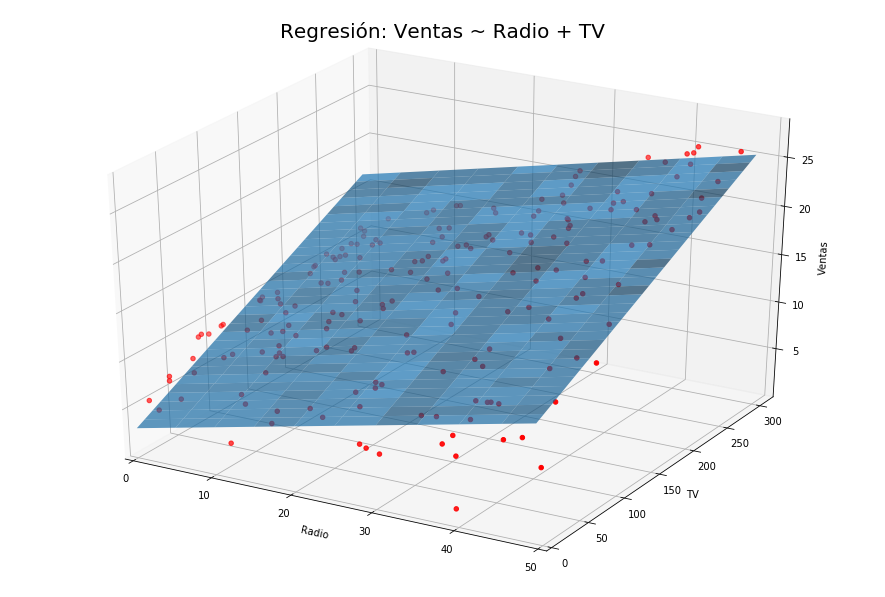

In [448]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

regr = skl_lm.LinearRegression()

X = data[['radio', 'TV']].as_matrix()
y = data.sales

regr.fit(X,y)

# Crear una cuadricula de coordenadas
Radio = np.arange(0,50)
TV = np.arange(0,300)

B1, B2 = np.meshgrid(Radio, TV, indexing='xy')
Z = np.zeros((TV.size, Radio.size))

for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(regr.intercept_ + B1[i,j]*regr.coef_[0] + B2[i,j]*regr.coef_[1])
        
# Create plot
fig = plt.figure(figsize=(12, 8))
fig.suptitle('Regresión: Ventas ~ Radio + TV', fontsize=20)

ax = axes3d.Axes3D(fig)

ax.plot_surface(B1, B2, Z, rstride=10, cstride=5, alpha=0.7)
ax.scatter3D(data.radio, data.TV, data.sales, c='r')

ax.set_xlabel('Radio')
ax.set_xlim(0,50)
ax.set_ylabel('TV')
ax.set_ylim(ymin=0)
ax.set_zlabel('Ventas')

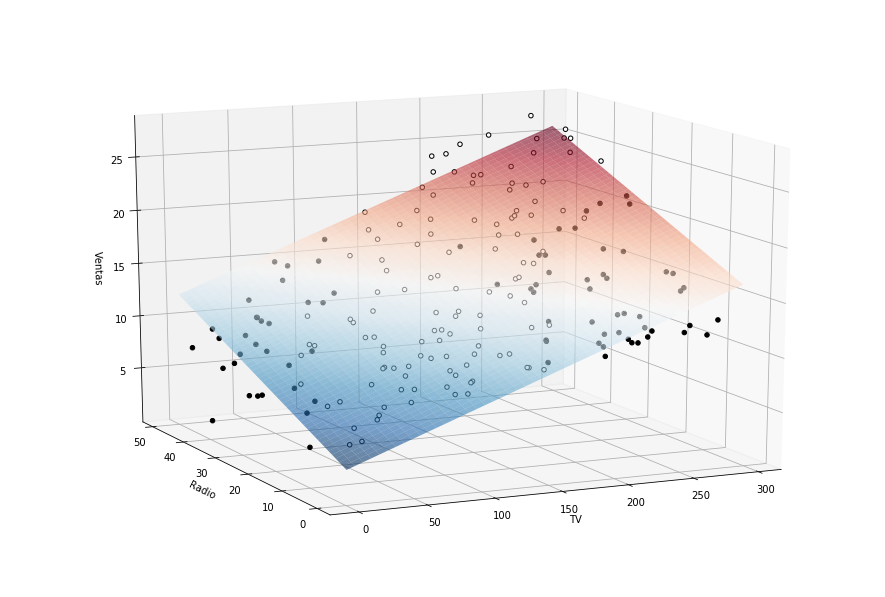

In [449]:
import statsmodels.api as sm

X = data[['TV', 'radio']]
y = data['sales']

## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

## Create the 3d plot -- skip reading this
# TV/Radio grid for 3d plot
xx1, xx2 = np.meshgrid(np.linspace(X.TV.min(), X.TV.max(), 100), 
                       np.linspace(X.radio.min(), X.radio.max(), 100))
# plot the hyperplane by evaluating the parameters on the grid
Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

# create matplotlib 3d axes
fig = plt.figure(figsize=(12, 8))
ax = axes3d.Axes3D(fig, azim=-115, elev=15)

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# plot data points - points over the HP are white, points below are black
resid = y - est.predict(X)
ax.scatter(X[resid >= 0].TV, X[resid >= 0].radio, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].TV, X[resid < 0].radio, y[resid < 0], color='black', alpha=1.0)

# set axis labels
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Ventas')

In [36]:
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score

regr = skl_lm.LinearRegression()

X = data[['radio', 'TV']].as_matrix()
y = data.sales

regr.fit(X,y)
print(regr.coef_)
print(regr.intercept_)

[ 0.18799423  0.04575482]
2.92109991241


In [40]:
# Emparejar los nombres con los coeficientes
zip(["radio","TV"], regr.coef_)

In [42]:
# Predecir algunas nuevas observaciones
#regr.predict([100, 25, 25])
# calculate R2
regr.score(X, y)

0.89719426108289557

Note que los **intervalos de confianza** y los **p-valores** no son facilmente accesibles a travéz de scikit-learn

**_¿Tiene sentido que la regresión múltiple sugiera que no hay relación entre ventas y la publicidad en periódicos mientras que la regresión lineal simple implica lo contrario?**_ 

Considere la **matriz de correlación** para las tres variables predictoras y la variable respuesta, que se muestran en la siguiente tabla. Observe que la correlación entre la radio y el periódico es 0.35. **Esto revela una tendencia a gastar más en publicidad en los periódicos en los mercados donde se gasta más en publicidad por radio**. Supongamos que la regresión múltiple es correcta y que la publicidad en los periódicos no tiene un impacto directo en las ventas, pero que la publicidad por radio sí aumenta las ventas. Luego, en los mercados donde gastamos más en radio, las ventas tenderán a ser más altas y, como muestra la matriz de correlaciones, en esos mismos mercados se tiende a gastar más en publicidad en los periódicos. Por lo tanto, en una simple regresión lineal que sólo examina las ventas frente al gasto en publicidad en los periódicos, observaremos que los valores más altos de la publicidad en periódicos tienden a estar asociados con valores más altos de ventas, aunque la publicidad en los periódicos no afecta realmente a las ventas. De esta manera, las ventas por periódicos son un sustituto del efecto de la publicidad radial; Periódico se gana el "crédito" por el efecto de la radio en las ventas.

>Este resultado ligeramente contraintuitivo es muy común en muchas situaciones de la vida real. Considere un ejemplo absurdo para ilustrar el punto. La realización de una regresión del número de ataques de tiburón versus las ventas de helado para los datos recolectados en una comunidad playera durante un período de tiempo mostraría una relación positiva, similar a la vista entre las ventas y el periódico. Por supuesto nadie (aún) ha sugerido que los helados deben ser prohibidos en las playas para tratar de reducir los ataques de los tiburones. En realidad, las temperaturas más altas hacen que más personas visiten la playa, lo que a su vez resulta en más ventas de helados y más ataques de tiburones. Una regresión múltiple de los ataques frente a las ventas de helado y la temperatura revela que, como lo indica la intuición, el _predictor anterior ya no es significativo después de ajustar por la temperatura_.

### Matriz de correlación

In [10]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


### Otra forma de ver las relaciones graficamete

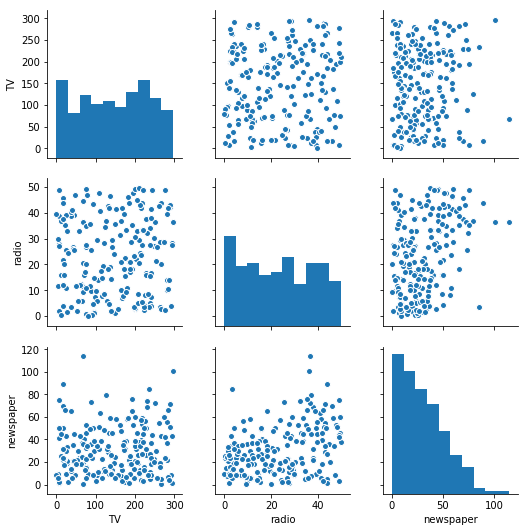

In [73]:
sns.pairplot(data[['TV','radio','newspaper']]);

**Podemos encontrar algunas cosas como:**

- TV y radio tienen p-valores significantes, mientras que periódico no. Asi nosotros rechazamos la hipótesis nula para TV y Radio (_Osea que no hay asociación entre estas variables y las ventas_), y falla para rechazar la hipótesis nula para Periódico.

- Los gastos en públicidad para TV y Radio son ambos asociados positivamente con las ventas, donde el gasto en publicidad en periódico es ligeramente asociado negativamente con las ventas. Sin embargo, esto es irrelevante desde que nosotros rechazamos la hipótesis nula para periódico.

- Este modelo tiene un valor más alto de $R^2$ (0.897) que el modelo anterior, lo que significa que este modelo provee un mejor ajutste a los datos que el modelo que solamente incluye TV como variable predictora.


### Algunas Preguntas Importantes

Cuando realizamos una regresión lineal múltiple, por lo general estamos interesados en responder a algunas preguntas importantes.
1. ¿Es al menos uno de los predictores X1, X2,. . . , Xp útil en la predicción de la respuesta?
2. ¿Todos los predictores ayudan a explicar Y, o sólo un subconjunto de los predictores es
útil?
3. ¿Qué tan bien el modelo ajusta a los datos?
4. Dado un conjunto de valores predictores, ¿cuál es valor predicho de la respuesta, y qué tan precisa es la predicción?

A continuación abordamos cada una de estas preguntas.


### ¿Existe una relación entre la respuesta y los predictores?

Recuerde que en el ajuste de la regresión lineal simple, para determinar si existe una relación entre la respuesta y el predictor simplemente se puede verificar si β1 = 0. En el ajuste de regresión múltiple con p predictores, necesitamos preguntar si todos los coeficientes de regresión son cero, es decir, si β1 = β2 = · · · = βp = 0. Como en el ajuste de regresión lineal simple, se utiliza una prueba de hipótesis para responder a esta pregunta. Probamos la hipótesis nula.

$$ H_0: \beta_1 = \beta_2 = ... = \beta_p = 0 $$

versus la alternativa $H_a$: al menos un $\beta_j$ no es cero.

Esta prueba de hipótesis se realiza calculando el **estadístico F**:

$$ F = \frac{ (TSS - RSS)/p}{RSS / (n-p-1)} $$

donde 

$$ TSS = \sum_{i=1}^n (y_i - \bar y)^2 $$

$$ RSS = \sum_{i=1}^n (y_i - \hat y_i)^2 $$

Si los supuestos del modelo lineal son correctos, se puede probar que E{RSS/(n − p − 1)} = σ2 y que, dado que Ho es cierto, E{(TSS − RSS)/p} = σ2.

>Por lo tanto, cuando no hay relación entre la respuesta y los predictores, se esperaría que el estadístico F asumiera un valor cercano a 1. Por otro lado, si Ha es verdadera, entonces E {(TSS - RSS) / p}> σ2, por lo que se esperaría que F sea mayor que 1.

El **estadístico F** para el modelo de regresión lineal múltiple obtenido por la regresión de las ventas sobre los gastos en publicidad en radio, televisión y periódicos se muestran en la siguiente tabla:

In [506]:
lm2.summary().tables[0]

Dep. Variable:,sales,R-squared:,0.897
Model:,OLS,Adj. R-squared:,0.896
Method:,Least Squares,F-statistic:,859.6
Date:,"Mon, 23 Oct 2017",Prob (F-statistic):,4.83e-98
Time:,11:37:50,Log-Likelihood:,-386.20
No. Observations:,200,AIC:,778.4
Df Residuals:,197,BIC:,788.3
Df Model:,2,,
Covariance Type:,nonrobust,,


En este ejemplo, el estadístico F es 570. Dado que es mucho mayor que 1, hay evidencia convincente contra la hipótesis nula H0. En otras palabras, el estadístico F sugiere que al menos uno de los medios publicitarios debe estar relacionado con las ventas. Sin embargo, ¿qué pasaría si el estadístico F estuviera más cerca de 1? ¿Qué tamaño debe tener el estadístico F antes de rechazar H0 y concluir que hay una relación? Resulta que la respuesta depende de los valores de n y p. Cuando n es grande, un estadístico F que es sólo un poco más grande que 1 aún podría proporcionar evidencia contra H0.

En contraste, un estadístico F más grande es necesario para rechazar H0 si n es pequeño. Cuando H0 es verdadera y los _errores tienen una distribución normal_, el estadístico F sigue una distribución F. Para cualquier valor dado de n y p, cualquier paquete de software estadístico puede usarse para calcular el p-valor asociado con el estadístico F utilizando esta distribución. Basado en este p-valor, podemos determinar si rechazamos o no H0. Para los datos de publicidad, el p-valor asociado al estadístico F en la Tabla 1.6 es esencialmente cero, por lo que tenemos evidencia extremadamente fuerte de que al menos uno de los medios de publicidad se asocia con el aumento de las ventas.

Teniendo en cuenta estos p-valores individuales para cada variable, ¿por qué tenemos que mirar al estadístico F? Después de todo, parece probable que si alguno de los p-valores de las variables individuales es muy pequeño, _al menos uno de los predictores está relacionado con la respuesta_. Sin embargo, esta lógica es defectuosa, especialmente cuando el _número de predictores p es grande_.


Por lo tanto, si se utilizan los estadísticos t individuales y los p-valores asociados para decidir si existe o no una asociación entre las variables y la respuesta, existe una probabilidad muy alta de que se concluya erróneamente de que existe una relación. Sin embargo, el estadístico F no sufre de este problema, ya que se ajusta por el número de predictores.

El enfoque de usar un estadístico F para probar cualquier asociación entre los predictores y la respuesta funciona cuando _p es relativamente pequeño y realmente pequeño comparado con n_. Sin embargo, a veces tenemos un gran número de variables. Si p> n entonces hay más coeficientes βj para estimar que observaciones con las cuales estimarlos. En este caso, ni siquiera podemos ajustar el modelo de regresión lineal múltiple usando mínimos cuadrados, por lo que no se puede utilizar el estadístico F, ni tampoco la mayoría de los otros conceptos que hemos visto hasta ahora en este capítulo. Cuando p es grande, se pueden usar algunos de los enfoques discutidos en la siguiente sección, como la _selección hacia adelante_. Este ajuste de _alta dimensionalidad_ se discutirá después.

### La decisión sobre las variables que son importantes

Como se discutió en la sección anterior, el primer paso en un análisis de regresión múltiple es calcular el estadístico F y examinar el p-valor asociado. Si concluimos sobre la base de ese p-valor que al menos uno de los predictores está relacionado con la respuesta, entonces es natural preguntarse cuáles predictores son los culpables? Podríamos mirar los p-valores individuales, pero como se discutió, si p es grande, es probable que hagamos algunos _descubrimientos falsos_. Es posible que todos los predictores estén asociados con la respuesta, pero es _más frecuente que la respuesta sólo esté relacionada con un subconjunto de los predictores_. La tarea de determinar qué predictores están asociados con la respuesta, con el fin de ajustar un modelo único que involucre sólo aquellos predictores, se conoce como la _**selección de variables**_. Aquí sólo proporcionaremos un breve esbozo de algunos enfoques clásicos.

Idealmente, nos gustaría realizar una selección de variables probando una gran cantidad de modelos diferentes, cada uno de los cuales contiene un subconjunto diferente de los predictores. Por ejemplo, si p=2, entonces podemos considerar cuatro modelos: (1) un modelo que no contenga variables, (2) un modelo que contenga sólo X1, (3) un modelo que contenga sólo X2 y (4) un modelo que contenga ambos X1 y X2. A continuación, podemos seleccionar el mejor modelo de todos los modelos que hemos considerado.

¿Cómo se determina cuál modelo es el mejor? Se pueden utilizar varios estadísticos para juzgar la calidad de un modelo. Estos incluyen el ** estadístico Cp de Mallows, el criterio de información de Akaike (AIC), el criterio de información bayesiano (BIC) y el R2 ajustado**. También podemos determinar qué modelo es el mejor graficando varios resultados del modelo, tales como los residuos, para buscar patrones.

Desafortunadamente, hay un total de $2^p$ modelos que contienen subconjuntos de p variables. Esto significa que incluso para p moderado, probar cada posible subconjunto de los predictores es inviable. Por ejemplo, vimos que si p = 2, entonces hay $2^2$ = 4 modelos que considerar. Pero si p=30, entonces debemos considerar $2^{30} = 1.073.741.824$ modelos! y esto no es práctico. Por lo tanto, a menos que p sea muy pequeño, no podemos considerar todos los $2^p$ modelos, y en su lugar necesitamos un enfoque automatizado y eficiente para elegir un conjunto más pequeño de modelos a considerar. Existen tres enfoques clásicos para esta tarea:

- **Selección hacia adelante**. Comenzamos con el modelo nulo, es decir, un modelo que contiene un intercepto pero no predictores. A continuación, se ajustan p regresiones simples lineales y se añade al modelo nulo la variable que da como resultado el RSS más bajo. Luego añadimos a ese modelo la variable que da como resultado el RSS más bajo para el nuevo modelo de dos variables. Este enfoque se continúa hasta que se cumple alguna regla de detención.

- **Selección hacia atrás**. Comenzamos con todas las variables del modelo y eliminamos la variable con el mayor p-valor, es decir, la variable que es menos significativa desde el punto de vista estadístico. El nuevo modelo con (p-1) variables se ajusta y se elimina la variable con el mayor p-valor. Este procedimiento continúa hasta que se alcanza una regla de detención. Por ejemplo, podemos detener el proceso cuando todas las variables restantes tienen un p-valor por debajo de cierto umbral.

- **Selección mixta**. Esta es una combinación de selección hacia adelante y hacia atrás. Comenzamos sin variables en el modelo, y como con la selección de selección hacia adelante, agregamos la variable que proporciona el mejor ajuste. Continuamos agregando variables una por una. Por supuesto, como hemos observado con el ejemplo de publicidad, los p-valores para las variables pueden llegar a ser más grandes a medida que se agregan nuevos predictores al modelo. Por lo tanto, si en cualquier punto el p-valor para una de las variables en el modelo se eleva por encima de cierto umbral, entonces eliminamos esa variable del modelo. Continuamos realizando estos pasos hacia adelante y hacia atrás hasta que todas las variables del modelo tengan un p-valor lo suficientemente bajo, y todas las variables fuera del modelo tendrían un gran p-valor si se añadieran al modelo.

La selección hacia atrás no se puede usar si p>n, mientras que la selección hacia adelante siempre se puede usar. La selección hacia adelante es un enfoque ambicioso, y al comienzo puede incluir variables que luego se vuelven redundantes. La selección mixta puede remediar esto.

In [242]:
# Incluyendo solo TV y Radio en el modelo
lm = smf.ols(formula='sales ~ TV + radio', data=data).fit()
lm.rsquared

0.89719426108289568

In [243]:
# Incluyendo TV, Radio y periódico en el modelo (El cual creemos no tiene asociacion fuerte con las ventas)
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()
lm.rsquared

0.89721063817895219

In [245]:
# Visualizar los p-valor para los coeficientes del modelo
lm.pvalues

Intercept    1.267295e-17
TV           1.509960e-81
radio        1.505339e-54
newspaper    8.599151e-01
dtype: float64

### El Ajuste del Modelo

Dos de las medidas numéricas más comunes de ajuste de modelo son el RSE y $R^2$, la fracción de varianza explicada. Estas cantidades se calculan e interpretan de la misma manera que para la regresión lineal simple.

Recuerde que en la regresión simple, $R^2$ es el cuadrado de la correlación de la respuesta y la variable. En la regresión lineal múltiple, el $R^2$ es igual a la $Cor(Y ,\hat Y)^2$, el cuadrado de la correlación entre la respuesta y el modelo lineal ajustado; de hecho, una propiedad del modelo lineal ajustado por mínimos cuadrados es que maximiza esta correlación entre todos los modelos lineales posibles.

Un valor de $R^2$ cercano a 1 indica que el modelo explica una gran parte de la varianza en la variable de respuesta. Como ejemplo, vimos que para los datos de publicidad, el modelo que utiliza los tres medios publicitarios para predecir las ventas tiene un $R^2$ de 0.8972. Por otro lado, el modelo que utiliza sólo la televisión y la radio para predecir las ventas tiene un valor $R^2$ de 0.89719. En otras palabras, hay un pequeño aumento en $R^2$ si incluimos la publicidad de periódicos en el modelo que ya contiene publicidad en televisión y radio, aunque vimos anteriormente que el p-valor para la publicidad de periódicos no es significativo. **Resulta que $R^2$ aumentará siempre cuando se agreguen más variables al modelo, incluso si esas variables sólo están débilmente asociadas con la respuesta.**

Esto se debe al hecho de que la adición de otra variable a las ecuaciones de mínimos cuadrados debe permitirnos ajustar los datos de entrenamiento (aunque no necesariamente los datos de prueba) con mayor precisión. Por lo tanto, el estadístico $R^2$, que también se calcula en los datos de entrenamiento, debe aumentar. El hecho de que la adición de publicidad en los periódicos al modelo que sólo contiene publicidad en la televisión y en la radio produce sólo un pequeño incremento en $R^2$ proporciona pruebas adicionales de que el periódico puede ser eliminado del modelo. Esencialmente, el periódico no proporciona una mejora real en el ajuste del modelo a las muestras de entrenamiento, y su inclusión probablemente dará lugar a malos resultados en las muestras de prueba independientes debido al sobreajuste.

Por el contrario, el modelo que contenía sólo TV como predictor tenía un R2 de 0.61. La adición de radio al modelo conduce a una mejora sustancial en $R^2$. Esto implica que un modelo que usa los gastos de televisión y radio para predecir las ventas es sustancialmente mejor que uno que usa sólo publicidad en televisión. Podríamos cuantificar esta mejora mirando el p-valor para el coeficiente de radio en un modelo que contiene sólo TV y radio como predictores.

El modelo que contiene sólo TV y radio como predictores tiene un RSE de 1.681, y el modelo que también contiene el periódico como predictor tiene un RSE de 1.686!. Por el contrario, el modelo que contiene sólo TV tiene un RSE de 3.26. Esto corrobora nuestra conclusión anterior de que un modelo que usa los gastos de televisión y radio para predecir las ventas es mucho más preciso (en los datos de entrenamiento) que uno que sólo usa el gasto en televisión.

Además, dado que los gastos de televisión y radio se utilizan como predictores, tampoco tiene sentido utilizar el gasto de los periódicos como predictor en el modelo. Es importante preguntarse cómo el RSE puede aumentar cuando el periódico se añade al modelo dado que la RSS debe disminuir. En general el RSE se define como:

$$ RSE = \sqrt{ \frac{1}{n - p - 1} RSS } $$

la cual se simplifica la anterior ecuación para una regresión lineal simple. Por lo tanto, los modelos con más variables pueden tener mayor RSE si la disminución en RSS es pequeña en relación con el aumento en p.

Además de mirar los estadísticos RSE y $R^2$ (ajustado), puede ser útil graficar los datos. ** Los resúmenes gráficos pueden revelar problemas en el modelo que no son visibles desde los valores obtenidos por los estadísticos**.

Por ejemplo, la siguiente figura muestra un gráfico tridimensional de TV y radio versus ventas. Se observa que algunos datos están por encima y algunas otras observaciones están por debajo del plano de regresión de mínimos cuadrados. En particular, el modelo lineal parece sobreestimar las ventas en los casos en que la mayor parte del dinero publicitario se gastó exclusivamente en televisión o radio. Subestima las ventas para los casos en que el presupuesto se dividió entre los dos medios de comunicación.


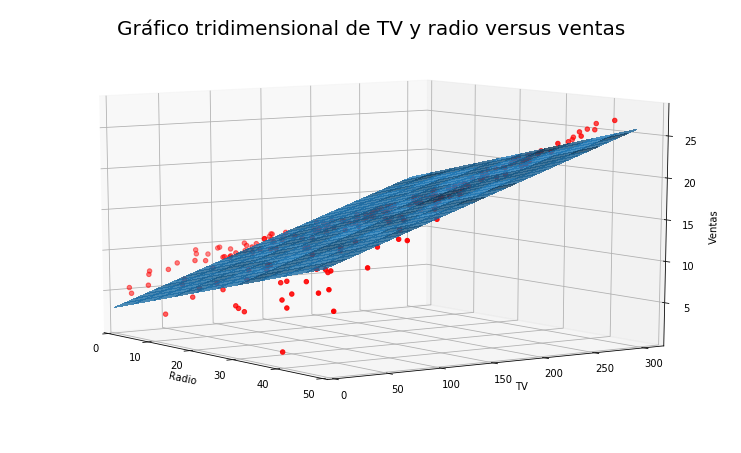

In [143]:
regr = skl_lm.LinearRegression()
X = data[['radio', 'TV']].as_matrix()
y = data.sales
regr.fit(X,y)

# Crear una cuadricula de coordenadas
Radio = np.arange(0,50)
TV = np.arange(0,300)
B1, B2 = np.meshgrid(Radio, TV, indexing='xy')
Z = np.zeros((TV.size, Radio.size))

for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(regr.intercept_ + B1[i,j]*regr.coef_[0] + B2[i,j]*regr.coef_[1])
        
# Create plot
fig = plt.figure(figsize=(10,6))
fig.suptitle('Gráfico tridimensional de TV y radio versus ventas', fontsize=20)

ax = axes3d.Axes3D(fig)

ax.plot_surface(B1, B2, Z, rstride=10, cstride=5, alpha=0.8, antialiased=False)
ax.scatter3D(data.radio, data.TV, data.sales, c='r')

ax.view_init(10, -35) # rotar las axisas (elv, azim)

ax.set_xlabel('Radio')
ax.set_xlim(0,50)
ax.set_ylabel('TV')
ax.set_ylim(ymin=0)
ax.set_zlabel('Ventas');


Este pronunciado patrón no lineal no puede ser modelado con precisión usando la regresión lineal. Sugiere un efecto de sinergia o interacción entre los medios publicitarios, por lo que la combinación de los medios de comunicación en conjunto da como resultado un mayor impulso a las ventas que el uso de cualquier medio individual. En próximas secciones, discutiremos la _extensión del modelo lineal_ para acomodar tales efectos sinérgicos a través del uso de términos de interacción.

### Predicciones

Una vez que se ha ajustado el modelo de regresión múltiple, es sencillo aplicar la ecuación $y = \beta_0 + \beta_1x_1 + \beta_2x_2 +... + \beta_px_p + \epsilon$ para predecir la respuesta $Y$ sobre la base de un conjunto de valores para los predictores $X_1, X_2, ... , X_p$. Sin embargo, hay tres tipos de incertidumbre asociada con esta predicción.


1. Los coeficientes estimados  $\hat \beta_0 + \hat \beta_1 + ... + \hat \beta_p$ son estimaciones para $\beta_0 + \beta_1 + ... + \beta_p$. 

Es decir, el plano de mínimos cuadrados 
$$ \hat Y = \hat \beta_0 + \hat \beta_1x_1 + ... + \hat \beta_px_p$$

es sólo una estimación para el verdadero _plano de regresión poblacional_

$$ f(X) = \beta_0 + \beta_1x_1 + ... + \beta_px_p$$

La inexactitud en las estimaciones de los coeficientes está relacionada con el _error reducible_ visto antes. Podemos calcular un _intervalo de confianza_ para determinar cuan cercano estará $\hat Y $ a $f(X)$.

2. Por supuesto, en la práctica suponiendo que un modelo lineal para $f(X)$ es una buena aproximación de la realidad, hay una fuente adicional de error potencialmente reducible que llamamos _sesgo del modelo_. Así que cuando usamos un modelo lineal, de hecho estamos estimando la mejor aproximación lineal a la superficie verdadera. Sin embargo, aquí ignoraremos esta discrepancia, y operaremos como si el modelo lineal fuera correcto.

3. Incluso si supiéramos qué es $f(X)$, es decir, incluso si conociéramos los valores verdaderos para $\beta_0 + \beta_1 + ... + \beta_p$, el valor de respuesta no puede ser predicho perfectamente debido al error aleatorio $\epsilon$ en el modelo. $\epsilon$ es llamado el _error irreducible_. ¿Cuánto discrepa $Y$ de $\hat Y$ ? El uso de _intervalos de predicción_ responde a esta pregunta.

Los intervalos de predicción son siempre más amplios que los intervalos de confianza, ya que incorporan tanto el error en la estimación de $f(X)$ (el error reducible) como la incertidumbre de cuánto diferirá un punto individual del plano de regresión poblacional (el error irreducible).

Se utiliza un intervalo de confianza para cuantificar la incertidumbre que rodea las ventas promedio en un gran número de ciudades. Por ejemplo, dado que en cada ciudad se gastan \$100,000 en publicidad de televisión y \$20,000 en publicidad de radio, el intervalo de confianza del 95% es [10,985, 11,528]. Esto significa que el 95% de los intervalos de esta forma contendrán el verdadero valor de $E(Y)= f(X)$.

$$ y = \beta_0 + \beta_1 \times TV + \beta_1 \times Radio  $$

$$ y = 2.921100 + 100 \times TV + 20 \times radio $$

Por otro lado, un intervalo de predicción puede usarse para cuantificar la incertidumbre que rodea las ventas de una ciudad en particular. Dado que en una ciudad se gasta \$100,000 en publicidad de televisión y \$20,000 en publicidad de radio, el intervalo de predicción del 95% es [7,930, 14,580]. Esto significa que el 95% de los intervalos de esta forma contendrán el verdadero valor de Y (las ventas) para esa ciudad. Ambos intervalos están centrados en 11.256, pero el intervalo de predicción es sustancialmente más amplio que el intervalo de confianza, lo que refleja la mayor incertidumbre sobre las ventas de una ciudad en comparación con las ventas promedio en muchas ciudades.

In [218]:
# Creamos un modelo con los predictores necesarios
lm2 = smf.ols(formula='sales ~ TV + radio', data=data).fit()
# Visualizamos los coeficientes
lm2.params

Intercept    2.921100
TV           0.045755
radio        0.187994
dtype: float64

In [219]:
# Manualmente  Predecir inversión de 100 mil en publicidad TV y 20 mil en Radio
ventas = 2.921100 + 0.045755 * 100 + 0.187994 * 20
print("Cantidad de ventas aprox: ",ventas*1000)

Cantidad de ventas aprox:  11256.48


In [223]:
# Tenemos que crear un DataFrame que es lo que espera la formula en la librería Statsmodels
X_new = pd.DataFrame({'TV': [100], 'radio': [20]}) # , 'newspaper': [0]
X_new.head()

,TV,radio
0,100,20


In [228]:
# Utilizar el modelo para estimar los valores con nuevas observaciones
lm2.predict(X_new)

0    11.256466
dtype: float64

In [225]:
lm2.conf_int() # Intervalo de confianza del 95%

,0,1
Intercept,2.340343,3.501857
TV,0.043013,0.048497
radio,0.172139,0.203850


In [226]:
lm2.conf_int(alpha=0.10) # Intervalo de confianza del 90%

,0,1
Intercept,2.434419,3.407781
TV,0.043457,0.048053
radio,0.174707,0.201281


#### Con scikit-learn

In [255]:
# Predicción
feature_cols = ['TV', 'radio']
X = data[feature_cols]
y = data.sales

# from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# lm.predict(X)[0:5] # Predecir las primeras 5 observaciones
# Predecir 100 mil en publicidad TV y 20 mil en Radio
# Manualmente sería
ventas = 2.92109991241 + 0.045755 * 100 + 0.187994 * 20
print("Cantidad de ventas aprox:  %.0f" % (ventas*1000))

X_new = pd.DataFrame({'TV': [100], 'radio': [20]})
lm.predict(X_new)

# calculate the R2
print("R2:  %.3f" % lm.score(X, y))

Cantidad de ventas aprox:  11256
R2:  0.897


## Otras consideraciones en el modelo de regresión

### Predictores cualitativos

Hasta ahora, hemos asumido que todas las variables en nuestro modelo de regresión lineal son cuantitativas. Pero en la práctica, esto no es necesariamente el caso; a menudo algunos predictores son cualitativos.

Por ejemplo, el conjunto de datos de "**crédito**" para individuos que se muestra en la siguiente figura registra el **saldo** (promedio de la deuda de tarjetas de crédito), así como varios predictores cuantitativos: **edad, tarjetas** (número de tarjetas de crédito), **educación** (años de educación), **ingreso** (en miles de dólares), **límite** (límite de crédito) y **calificación** (calificación crediticia). Cada panel de la gráfica es un diagrama de dispersión para un par de variables que están identificadas por las etiquetas de fila y columna correspondientes. Por ejemplo, el diagrama de dispersión a la derecha de la palabra "Saldo" grafica directamente el saldo frente a la edad, mientras que el gráfico a la derecha de "Edad" corresponde a la edad versus las tarjetas. Además de estas variables cuantitativas, también tenemos cuatro variables cualitativas: **sexo, estudiante** (estatus estudiantil), **estatus** (estado civil) y **etnia** (caucásica, afroamericana o asiática).

In [138]:
# Cargamos los datos de Crédito 
# Leemos los datos de un archivo en formato CSV y lo almacenamos en un DataFrame de la librearía Pandas
# El archivo puede ser leido directamente de un URL en internet o localmente una vez sea descargado.
datosCredito = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Credit.csv', index_col=0)
datosCredito.head() # Lista los primeros datos de la tabla o dataframe

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


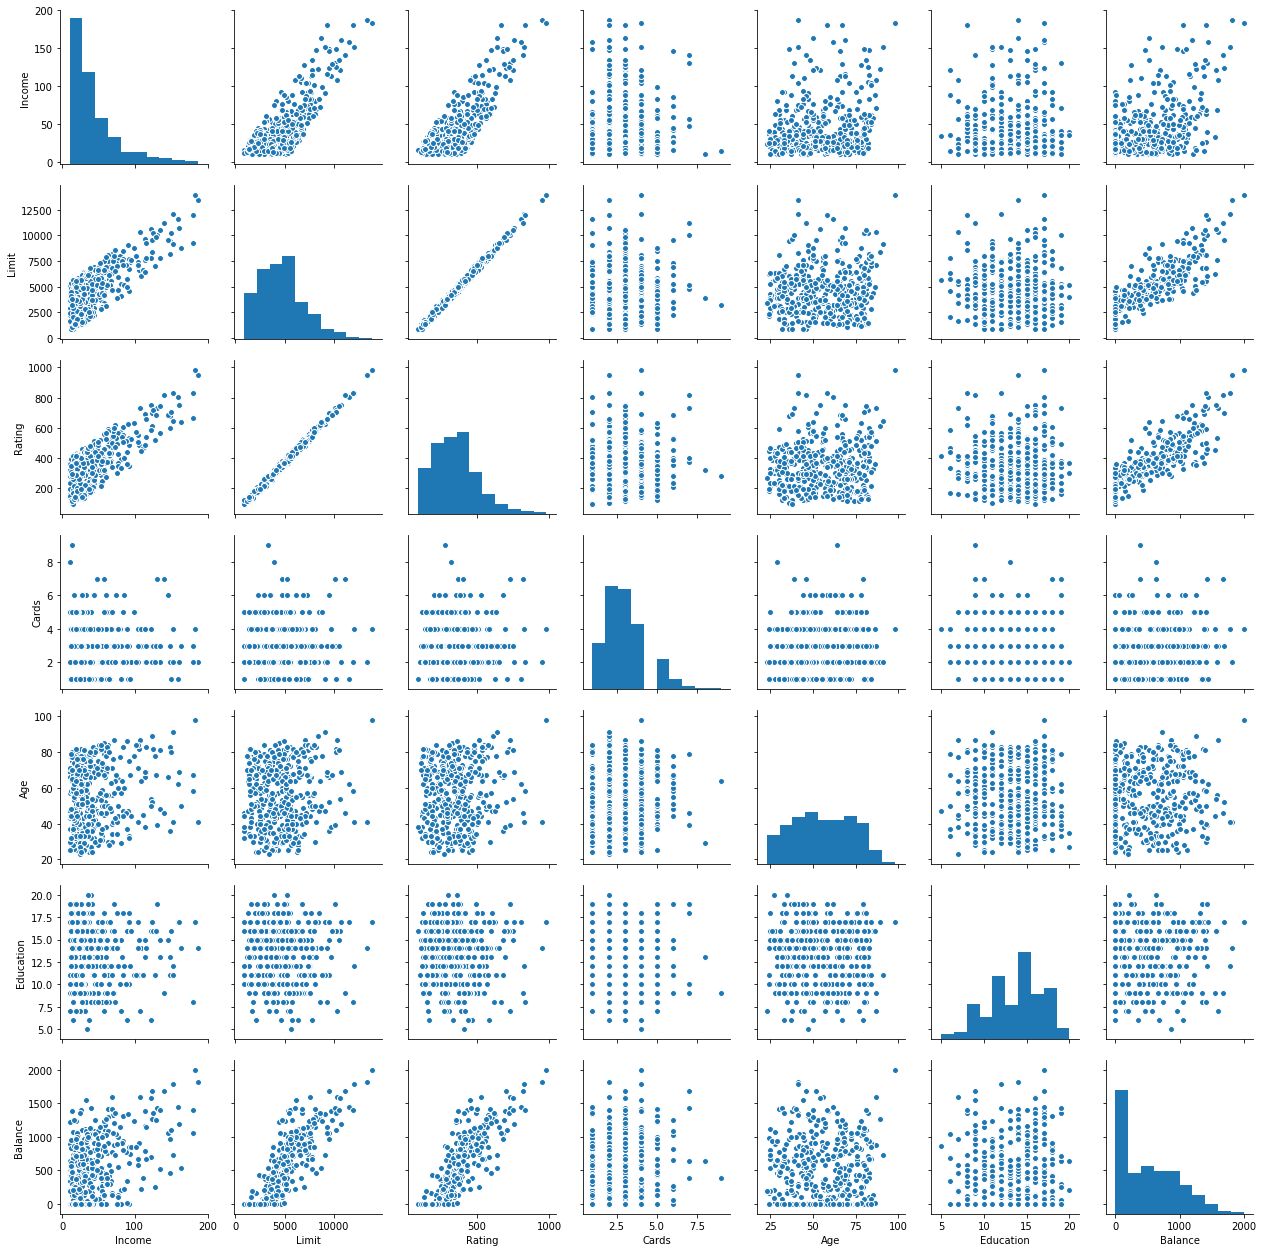

In [139]:
# Gráficamos 
sns.pairplot(datosCredito)

### Predictores cualitativos con sólo dos niveles

Suponga que deseamos investigar las diferencias en el saldo de tarjetas de crédito entre hombres y mujeres, ignorando las otras variables por el momento. Si un predictor cualitativo (también conocido como un _factor_) sólo tiene dos niveles, o categorías, o valores posibles, entonces su incorporación en un modelo de regresión es muy simple. Para esto se crea un indicador o variable _dummy_ que toma dos valores numéricos posibles. Por ejemplo, basándonos en la variable de género, podemos crear una nueva variable que tome la forma:

$$ x_i = \Bigg \{
\begin{align*} 
\text{1 si la i-esima persona es mujer} \\ 
\text{0 si la i-esima persona es hombre}
\end{align*}
$$

y esta variable se usa como una predictora en la ecuación de regresión. El modelo resultante es

$$ y_i = \beta_0 + \beta_1x_i + \epsilon_i =  \Bigg \{
\begin{align*} 
\beta_0 + \beta_1 + \epsilon_i \space\space \text{si la persona es mujer} \\ 
\beta_0 + \epsilon_i \space \text{si la persona es hombre}
\end{align*}
$$

Ahora $\beta_0$ se interpreta como el saldo promedio de la tarjeta de crédito para los hombres, $\beta_0 + \beta_1$ como el saldo promedio de la tarjeta de crédito para las mujeres, y $\beta_1$ como la diferencia promedia en el saldo de la tarjeta de crédito entre las mujeres y los hombres.

La siguiente tabla muestra las estimaciones de coeficientes y otra información asociada con el modelo anterior. Se estima que la deuda promedio de tarjetas de crédito para los hombres es de 509.80, mientras que para las mujeres se calcula que tienen 19.73 de deuda adicional para un total de 509.80 + 19.73 = 529.53. Sin embargo, observamos que el **p-valor para la variable dummy es muy alto**. _Esto indica que no hay evidencia estadística de una diferencia en el saldo promedio de tarjetas de crédito entre los géneros_.


In [257]:
est = smf.ols('Balance ~ Gender', datosCredito).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,509.8031,33.128,15.389,0.000,444.675,574.931
Gender[T.Female],19.7331,46.051,0.429,0.669,-70.801,110.267


La decisión de codificar a las mujeres como 1 y los hombres como 0 en la ecuación anterior es arbitraria, y no tiene ningún efecto en el ajuste de regresión, pero sí altera la interpretación de los coeficientes. Si hubiéramos codificado a los hombres como 1 y las mujeres como 0, entonces las estimaciones para $\beta_0$ y $\beta_1$ habrían sido 529.53 y -19.73, respectivamente, lo que conduce una vez más a una predicción de la deuda de tarjetas de crédito de 529.53 - 19.73 = 509.80 para los hombres y una predicción de 529.53 para las mujeres. Alternativamente, en lugar de un esquema de codificación 0/1, podríamos crear una variable dummy

$$ x_i = \Bigg \{
\begin{align*} 
\text{1 si la i-esima persona es mujer} \\ 
\text{-1 si la i-esima persona es hombre}
\end{align*}
$$

y usar esta variable en la ecuación de regresión. El modelo resultante es

$$ y_i = \beta_0 + \beta_1x_i + \epsilon_i =  \Bigg \{
\begin{align*} 
\beta_0 + \beta_1 + \epsilon_i \space\space \text{si la persona es mujer} \\ 
\beta_0 - \beta_1 + \epsilon_i \space \text{si la persona es hombre}
\end{align*}
$$

En este caso, $\beta_0$ puede ser interpretado como el saldo promedio de la tarjeta de crédito promedio (ignorando el efecto de género), y $\beta_1$ es la cantidad que las mujeres están por encima del promedio y que los hombres están por debajo del promedio. En este ejemplo, la estimación para $\beta_0$ es 519.665, a medio camino entre los promedios de hombres y mujeres de 509.80 y 529.53. La estimación para $\beta_1$ es 9.865, que es la mitad de 19.73, la diferencia media entre las mujeres y los hombres. Es importante señalar que las predicciones finales de los saldos de crédito de los hombres y las mujeres serán idénticas, _independientemente del esquema de codificación utilizado_. La única diferencia está en la forma en que se interpretan los coeficientes.

### Creando variables dummy manualmente

De igual forma podríamos haber creado una variable dummy para nuestros datos de publicidad. En este caso los datos de publicidad no tienen ningun predictor categórico, por lo que podemos crear uno de la siguiente forma a manera de ejemplo:


In [261]:
# Colocamos una semilla para poder reproducir el mismo ejercicio mas tarde
np.random.seed(12345)
# Creamos una seria de valores boleanos en los cuales la mitad serán True o de valor positivo
nums = np.random.rand(len(data))
mask_large = nums > 0.5

# Creamos un atributo tamaño o "Size" y le asignamos el valor "small", para luego cambiar la mitad a "large"
data['Size'] = 'small'
data.loc[mask_large, 'Size'] = 'large'
data.head()

,TV,radio,newspaper,sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


En scikit-learn, nosotros necesitamos representar todos los valores númericamente. Dado que nuestra variable dummy solo tiene dos categorias, podemos representar esta con valores binarios, asi:

In [262]:
# Creamos una nueva Serie llamada IsLarge
data['IsLarge'] = data.Size.map({'small':0, 'large':1})
data.head()

,TV,radio,newspaper,sales,Size,IsLarge
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


Creamos de nuevo la regresion lineal multiple incluyendo el predictor **IsLarge**:

In [267]:
feature_cols = ['TV', 'radio', 'newspaper', 'IsLarge']
X = data[feature_cols]
y = data.sales
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
lm.coef_

array([ 0.04571982,  0.18872814, -0.00109768,  0.05742385])

**Como interpretamos el coeficiente de IsLarge?**

Para una cantidad dada de gastos en públicidad para TV, Radio y Prensa; siendo un mercado grande esta asociado con un incremento promedio de ventas de 57.42 productos (comparado con un mercado pequeño, el cual es llamado nivel de línea base).

**Que pasa si invertimos los valores (0/1) y creamos un predictor 'IsSmall' en su lugar?**

El coeficiente debería ser el mismo, excepto que sería de valor negativo en lugar de positivo. Asi que de nuevo, la escogencia de la categoria para la línea base no importa, todo eso cambia es la interpretación de los coeficientes.


### Predictores cualitativos con más de dos niveles

Cuando un predictor cualitativo tiene más de dos niveles, una sola variable dummy no puede representar todos los valores posibles. En esta situación, podemos crear variables dummy adicionales. Por ejemplo, para la variable étnica se crean dos variables ficticias. La primera podría ser

$$ x_{i1} = \Bigg \{
\begin{align*} 
\text{1 si la i-esima persona es Asiática} \\ 
\text{0 si la i-esima persona no es Asiática}
\end{align*}
$$

y la segunda sería

$$ x_{i2} = \Bigg \{
\begin{align*} 
\text{1 si la i-esima persona es Caucásica} \\ 
\text{0 si la i-esima persona no es Caucásica}
\end{align*}
$$

Estas dos variables pueden ser usadas en la ecuación de regresión para obtener el modelo

$$ y_i = \beta_0 + \beta_1x_{i1}  + \beta_2x_{i2} + \epsilon_i =  \Bigg \{
\begin{align*} 
\beta_0 + \beta_1 + \epsilon_i \space\space \text{si la persona es Asiática} \\ 
\beta_0 + \beta_2 + \epsilon_i \space \text{si la persona es Caucásica} \\
\beta_0 + \epsilon_i \space \text{si la persona es Afroamericana}
\end{align*}
$$


Ahora $\beta_0$ puede ser interpretado como el saldo promedio de tarjetas de crédito para los Afroamericanos, $\beta_1$ puede interpretarse como la diferencia en el saldo promedio entre las categorías Asiática y Afroamericana, y $\beta_2$ puede interpretarse como la diferencia en el saldo promedio entre las categorías Caucásica y Afroamericana.

**Siempre habrá una variable dummy menos que el número de niveles que tenga la variable cualitativa**. El nivel sin variable dummy, Afroamericano en este ejemplo, se conoce como la _línea de base_. De la siguiente tabla, vemos que el saldo estimado para la línea base, Afroamericano, es 531.


In [452]:
#est = smf.ols('Balance ~ C(Ethnicity)', datosCredito).fit() # C significa en Statsmodel que utilice variables categóricas
est = smf.ols('Balance ~ Ethnicity', datosCredito).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,531.0000,46.319,11.464,0.000,439.939,622.061
Ethnicity[T.Asian],-18.6863,65.021,-0.287,0.774,-146.515,109.142
Ethnicity[T.Caucasian],-12.5025,56.681,-0.221,0.826,-123.935,98.930


Se estima que la categoría Asiática tendrá 18.69 dólares menos de deuda que la categoría Afroamericana y que la categoría Caucásica tendrá menos 12.50 dólares de deuda que la categoría Afroamericana. Sin embargo, los p-valores asociados con las estimaciones de los coeficientes para las dos variables ficticias son muy grandes, lo que sugiere que no hay evidencia estadística de una diferencia real en el saldo de tarjetas de crédito entre las etnias.

Una vez más, el nivel seleccionado como categoría de línea de base es arbitrario y las predicciones finales para cada grupo serán las mismas independientemente de esta elección. Sin embargo, los coeficientes y sus p-valores dependen de la elección de la codificación de la variable ficticia. En lugar de confiar en los coeficientes individuales, podemos usar una prueba F para probar $H_0$: $\beta_1=\beta_2=0$, la cual no depende de la codificación. Esta prueba F tiene un p-valor de 0,96, lo que indica que no podemos rechazar la hipótesis nula de que no hay relación entre saldo y etnicidad.

El uso de este enfoque variable dummy no presenta dificultades cuando se incorporan tanto los predictores cuantitativos como cualitativos. Por ejemplo, para regresar el saldo sobre una variable cuantitativa como el ingreso y una variable cualitativa como estudiante, debemos simplemente crear una variable ficticia para estudiante y luego ajustar un modelo de regresión múltiple usando el ingreso y la variable ficticia como predictores del saldo de la tarjeta de crédito.

Hay muchas maneras diferentes de codificar las variables cualitativas además del enfoque de variable ficticia que se toma aquí. Todos estos enfoques conducen a ajustes de modelos equivalentes, pero los coeficientes son diferentes, tienen diferentes interpretaciones, y están diseñados para medir contrastes particulares.


### Utilizando los datos de públicidad

De neuvo si utilizaramos los datos de Públicidad, podemos crear un nuevo predictor con mas de 3 categorias de la siguiente manera:

Creemos un nuevo atributo o variable llamada "**Area**" y aleatoriamente asignemos observaciones que contengan los valores de **rural, suburban, y urban**

In [268]:
np.random.seed(123456)
# Asignar un tercio de las observaciones a cada grupo
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
data['Area'] = 'rural'
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'
data.head()

,TV,radio,newspaper,sales,Size,IsLarge,Area
1,230.1,37.8,69.2,22.1,large,1,rural
2,44.5,39.3,45.1,10.4,small,0,urban
3,17.2,45.9,69.3,9.3,small,0,rural
4,151.5,41.3,58.5,18.5,small,0,urban
5,180.8,10.8,58.4,12.9,large,1,suburban


Tenemos que de nuevo, representar los valores del predictor Area de forma númerica; pero esta vez no podemos simplemente codificarlos como 0=rural, 1=suburban, 2=urban por que de esta forma implicaría una relación ordenada entre suburban y urban (y asi urban es como "dos veces" la categoría suburban).

En lugar, creamos otra variable dummy asi:

In [269]:
# Creamos 3 variables dummy utilizando la función get_dummies de la libreria pandas, 
# y luego excluimos la primer columna
area_dummies = pd.get_dummies(data.Area, prefix='Area').iloc[:, 1:]

# Concatenamos o unimos las columnas de la variable dummy con los datos originales
# del DataFrame (axis=0 significa filas, axis=1 significa columnas)
data = pd.concat([data, area_dummies], axis=1)
data.head()

,TV,radio,newspaper,sales,Size,IsLarge,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,large,1,rural,0,0
2,44.5,39.3,45.1,10.4,small,0,urban,0,1
3,17.2,45.9,69.3,9.3,small,0,rural,0,0
4,151.5,41.3,58.5,18.5,small,0,urban,0,1
5,180.8,10.8,58.4,12.9,large,1,suburban,1,0


Donde:

- **rural** es codificado como Area_suburban=0 y Area_urban=0<br>
- **suburban** es codificado como Area_suburban=1 y Area_urban=0<br>
- **urban** es codificado como Area_suburban=0 y Area_urban=1


De nuevo, **¿por que solamente necesitamos 2 variables dummy y no 3?** Por que dos variables dummy capturan toda la información acerca del predictor **Area**, e implicitamente define rural como el nivel de _línea base_. (En general, si se tiene un predictor categórico con k niveles, entonces se crean k-1 variables dummy como se explico anteriormente)

Si esto es confuso, piense de nuevo en el predictor 'Size' (IsLarge) que solo necesitamos una variable dummy, no dos (IsSmall e IsLarge).

Ahora incluyamos estas nuevas variables dummy en el modelo:

In [271]:
feature_cols = ['TV', 'radio', 'newspaper', 'IsLarge', 'Area_suburban', 'Area_urban']
X = data[feature_cols]
y = data.sales
lm = LinearRegression()
lm.fit(X, y)
# print coefficients
lm.coef_

array([ 0.04574401,  0.1878667 , -0.0010877 ,  0.07739661, -0.10656299,
        0.26813802])

**¿Como interpreramos los coeficientes?**

- Dejando todas las otras variables constantes, un área **suburbana** esta asociada con el promedio en la **reducción** de ventas de 106.56 productos (comparado con la línea base, el cual es rural).

- Un área **urbana** esta asociada con el promedio en el **incremento** en ventas de 268.13 productos (comparado con lo rural)

Una nota final acerca de codificar variables dummy: Si se tienen categorías que pueden ser clasificadas en cierto orden (ej. fuertemente en desacuerdo, en desacuerdo, neutral, de acuerdo, fuertemente de acuerdo), potencialmente se puede usar una variable dummy y representarla con categorias númericas (semejante 1, 2, 3, 4, 5).


### Extensiones del modelo lineal

El modelo de regresión lineal estándar proporciona resultados interpretables y funciona bastante bien en muchos problemas del mundo real. Sin embargo, hace varios supuestos altamente restrictivos que a menudo son violados en la práctica. Dos de los supuestos más importantes afirman que la relación entre los predictores y la respuesta es _**aditiva y lineal**_.

La suposición aditiva significa que el efecto de los cambios en un predictor $X_j$ sobre la respuesta $Y$ es independiente de los valores de los otros predictores. La hipótesis lineal establece que el cambio en la respuesta $Y$ debido a un cambio de una unidad en $X_j$ es constante, independientemente del valor de $X_j$. A continuación se presentan algunos métodos que relajan estos dos supuestos. Se estudiarán brevemente algunos enfoques clásicos comunes para extender el modelo lineal.


#### Eliminación del supuesto de aditividad

En el análisis anterior de los datos de Públicidad, llegamos a la conclusión de que tanto la televisión como la radio parecen estar asociadas con las ventas. Los modelos líneales que formaron la base para esta conclusión supusieron que el efecto sobre las ventas de aumentar un medio publicitario es independiente de la cantidad gastada en los otros medios. Por ejemplo, uno de los modelos lineales anteriores establece que el efecto promedio sobre las ventas de un aumento de una unidad en TV es siempre $\beta_1$, independientemente de la cantidad gastada en radio.

Sin embargo, este modelo tan simple puede ser incorrecto. Supongamos que gastar dinero en propaganda radial realmente aumenta la efectividad de la publicidad televisiva, de modo que el coeficiente de la pendiente para TV debería aumentar a medida que aumenta el gasto en radio. En esta situación, dado un presupuesto fijo de 100,000 dólares, gastar la mitad en la radio y la mitad en la televisión puede aumentar las ventas más que asignar la cantidad total a la televisión o a la radio. En marketing, esto se conoce como un efecto de _sinergia_, y en estadística se conoce como un efecto de _interacción_. La figura tridimensional mostrada anteriormente sugiere que tal efecto puede estar presente en los datos de publicidad.

Observe que cuando uno de los niveles de TV o radio es bajo, las ventas verdaderas son inferiores a las previstas por el modelo lineal. Pero cuando la publicidad se divide entre los dos medios, entonces el modelo tiende a subestimar las ventas. Considere el modelo de regresión lineal estándar con dos variables,

$$ Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \epsilon $$

Según este modelo, si aumentamos $X_1$ en una unidad, entonces Y aumentará en un promedio de $\beta_1$ unidades. Observe que la presencia de $X_2$ no altera esta afirmación, es decir, independientemente del valor de $X_2$, un incremento de una unidad en $X_1$ dará lugar a un incremento de unidad $\beta_1$ en $Y$. Una forma de ampliar este modelo para permitir efectos de interacción es incluir un tercer predictor, llamado término de interacción, que se construye calculando el producto de $X_1$ y $X_2$. Esto produce el modelo

$$ Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_1X_2 + \epsilon $$

¿Cómo la inclusión de este término de la interacción relaja el supuesto de aditividad? Observe que la Ec. anterior se puede reescribir como:

$$ Y = \beta_0 + (\beta_1 + \beta_3X_2)X_1 + \beta_2X_2 + \epsilon $$

$$ = \beta_0 + \tilde \beta_1X_1 + \beta_2X_2 + \epsilon $$

Donde $\tilde \beta_1 = \beta_1 + \beta_3X_2$. Dado que $\tilde \beta_1$ cambia con $X_2$, el efecto de $X_1$ en $Y$ ya no es constante: el valor de $X_2$ cambiará el impacto de $X_1$ en $Y$.

Por ejemplo, suponga que se quiere estudiar la productividad de una fábrica. Se desea predecir el número de unidades producidas sobre la base del número de líneas de producción y el número total de trabajadores. Parece probable que el efecto de aumentar el número de líneas de producción dependerá del número de trabajadores, ya que si no hay trabajadores disponibles para operar las líneas, el aumento del número de líneas no aumentará la producción. Esto sugiere que sería apropiado incluir un término de interacción entre líneas y trabajadores en un modelo lineal para predecir las unidades.

Suponga que cuando se ajusta el modelo, obtenemos

$$ units = 1.2 + 3.4 \times lines + 0.22 \times workers + 1.4 \times (lines \times workers ) $$

$$ = 1.2 + (3.4 + 1.4 \times workers) \times lines + 0.22 \times workers $$

En otras palabras, añadir una línea adicional aumentará el número de unidades producidas por 3.4 + 1.4 × trabajadores. Por lo tanto, cuanto más trabajadores tengamos, más fuerte será el efecto de las líneas de producción.


Regresando al ejemplo de Publicidad, un modelo lineal que utiliza radio, TV, y una interacción entre los dos para predecir las ventas toma la forma

$$ sales = \beta_0 + \beta_1 \times TV + \beta_2 \times radio + \beta_3 \times (radio \times TV) + \epsilon $$

$$ = \beta_0 + (\beta_1 + \beta_3 \times radio) \times TV + \beta_2 \times radio + \epsilon $$

Podemos interpretar $\beta_3$ como el aumento de la efectividad de la publicidad televisiva para un incremento de una unidad en la publicidad radial (o viceversa). Los coeficientes que resultan del ajuste del respectivo modelo se presentan en la siguiente tabla:



In [272]:
# Interacción de variables
est = smf.ols('sales ~ TV + radio + TV*radio', data).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.7502,0.248,27.233,0.000,6.261,7.239
TV,0.0191,0.002,12.699,0.000,0.016,0.022
radio,0.0289,0.009,3.241,0.001,0.011,0.046
TV:radio,0.0011,5.24e-05,20.727,0.000,0.001,0.001


Los resultados de la anterior tabla sugieren fuertemente que el modelo que incluye el término de interacción es superior al modelo que contiene sólo los efectos principales. El p-valor para el término de interacción, TV x radio, es extremadamente bajo, indicando que hay una fuerte evidencia de que $H_a$: $\beta_3$ es diferente de 0. En otras palabras, está claro que la verdadera relación no es aditiva. El $R^2$ para este modelo es 96.8%, comparado con solamente 89.7% para el modelo que predice ventas usando la TV y la radio sin un término de la interacción. Esto significa que (96,8-89,7)/(100-89,7) = 69% de la variabilidad en las ventas que permanece después de ajustar el modelo aditivo se ha explicado por el término de interacción.

Las estimaciones de los coeficientes en la tabla anterior sugieren que un aumento en la publicidad de televisión de 1,000 está asociado con el aumento de ventas de $(\hat \beta_1 +  \hat \beta_3 \times radio) \times 1,000 = 19 + 1.1 \times radio$ unidades.

Y un aumento de la publicidad en la radio de 1,000 se asociará con un aumento en las ventas de 

$(\hat \beta_2 +  \hat \beta_3 \times TV) \times 1,000 = 28.9 + 1.1 \times TV$ unidades.

En este ejemplo, los p-valores asociados con TV, radio y el término de interacción son todos estadísticamente significativos, por lo que es obvio que las tres variables deben ser incluidas en el modelo. Sin embargo, a veces ocurre que un término de interacción tiene un p-valor pequeño, pero los efectos principales asociados (en este caso, televisión y radio) no.

El _principio jerárquico_ establece que _si se incluye una interacción en un modelo, también debemos incluir los efectos principales, incluso si los p-valores asociados con sus coeficientes no son significativos_. En otras palabras, si la interacción entre $X_1$ y $X_2$ parece importante, entonces deberíamos incluir tanto $X_1$ como $X_2$ en el modelo, incluso si las estimaciones de sus coeficientes tienen grandes p-valores. La razón de este principio es que si $X_1 \times X_2$ está relacionado con la respuesta, entonces si los coeficientes de $X_1$ o $X_2$ son exactamente cero es de poco interés. También $X_1 \times X_2$ se correlaciona típicamente con $X_1$ y $X_2$, y así dejarlas fuera tiende a alterar el significado de la interacción.

### Interacción entre variables cualitativas y cuantitativas

En el ejemplo anterior, se consideró una interacción entre la TV y la radio, ambas variables cuantitativas. Sin embargo, el concepto de interacción se aplica tanto a variables cualitativas como a una combinación de variables cuantitativas y cualitativas. De hecho, una interacción entre una variable cualitativa y una variable cuantitativa tiene una interpretación particularmente importante. 

Consideremos el conjunto de datos de **Crédito** y supongamos que deseamos predecir el saldo usando las variables de ingreso (cuantitativo) y de estudiante (cualitativo). En ausencia de un término de interacción, el modelo toma la forma

$$ balance_i = \beta_0 + \beta_1 \times income_i + \Bigg \{
\begin{align*} 
\beta_2 \space\space \text{si la persona es estudiante} \\ 
0 \space \text{si la persona no es estudiante}
\end{align*}
$$

$$ = \beta_1 \times income_i + \Bigg \{
\begin{align*} 
\beta_0 + \beta_2 \space\space \text{si la persona es estudiante} \\ 
\beta_0 \space \text{si la persona no es estudiante}
\end{align*}
$$

Observe que esto equivale a ajustar a los datos dos rectas paralelas, una para los estudiantes y otra para los no estudiantes. Las rectas para estudiantes y no estudiantes tienen interceptos diferentes, $\beta_0 + \beta_2$ versus $\beta_0$, pero la misma pendiente, $\beta_1$. Esto se ilustra en el panel izquierdo de la siguiente figura. El hecho de que las rectas sean paralelas significa que el efecto promedio sobre el saldo de un aumento en una unidad de ingresos no depende de si el individuo es o no un estudiante.

Esto representa una limitación potencialmente seria del modelo, ya que de hecho un cambio en los ingresos puede tener un efecto muy diferente en el saldo de la tarjeta de crédito de un estudiante versus un no estudiante. Esta limitación puede ser abordada mediante la adición de una variable de interacción, creada multiplicando el ingreso por la variable dummy para estudiante. Nuestro modelo ahora se convierte en

$$ balance_i = \beta_0 + \beta_1 \times income_i + \Bigg \{
\begin{align*} 
\beta_2 + \beta_3 \times income_i \space\space \text{si la persona es estudiante} \\ 
0 \space \text{si la persona no es estudiante}
\end{align*}
$$

$$ = \Bigg \{
\begin{align*} 
(\beta_0 + \beta_2) + (\beta_1 + \beta_3) \times income_i \space\space \text{si la persona es estudiante} \\ 
\beta_0 + \beta_1 \times income_i \space \text{si la persona no es estudiante}
\end{align*}
$$

Una vez más, tenemos dos rectas de regresión diferentes para los estudiantes y los no-estudiantes. Pero ahora esas rectas de regresión tienen diferentes interceptos, $\beta_0 + \beta_2$ frente a $\beta_0$, así como diferentes pendientes, $\beta_1 + \beta_3$ frente a $\beta_1$. Esto permite la posibilidad de que los cambios en los ingresos puedan afectar los saldos de tarjetas de crédito de estudiantes y no estudiantes de manera diferente. El panel derecho de la siguiente figura muestra las relaciones estimadas entre ingreso y saldo para estudiantes y no estudiantes en el anterior modelo. Observamos que la pendiente para los estudiantes es menor que la pendiente para los no-estudiantes. Esto sugiere que los aumentos en los ingresos están asociados con aumentos más pequeños en el saldo de la tarjeta de crédito entre los estudiantes en comparación con los no estudiantes.

In [450]:
est1 = smf.ols('Balance ~ Income + C(Student)', datosCredito).fit()
regr1 = est1.params
est2 = smf.ols('Balance ~ Income + Income*C(Student)', datosCredito).fit()
regr2 = est2.params

print('Regresión 1 - sin terminos interacutando')
print(regr1)
print('\nRegresion 2 - con interacción de terminos')
print(regr2)

Regresión 1 - sin terminos interacutando
Intercept            211.142964
C(Student)[T.Yes]    382.670539
Income                 5.984336
dtype: float64

Regresion 2 - con interacción de terminos
Intercept                   200.623153
C(Student)[T.Yes]           476.675843
Income                        6.218169
Income:C(Student)[T.Yes]     -1.999151
dtype: float64


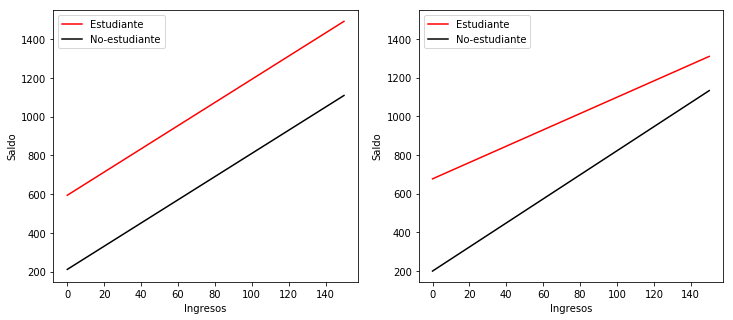

In [283]:
# Ingresos (x-axis)
income = np.linspace(0,150)
# Saldo sin terminos de interacción (y-axis)
student1 = np.linspace(regr1['Intercept']+regr1['Student[T.Yes]'],
                       regr1['Intercept']+regr1['Student[T.Yes]']+150*regr1['Income'])
non_student1 =  np.linspace(regr1['Intercept'], regr1['Intercept']+150*regr1['Income'])

# Saldo con terminos de interacción (y-axis)
student2 = np.linspace(regr2['Intercept']+regr2['Student[T.Yes]'],
                       regr2['Intercept']+regr2['Student[T.Yes]']+
                       150*(regr2['Income']+regr2['Income:Student[T.Yes]']))
non_student2 =  np.linspace(regr2['Intercept'], regr2['Intercept']+150*regr2['Income'])

# Creamos la gráfica
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.plot(income, student1, 'r', income, non_student1, 'k')
ax2.plot(income, student2, 'r', income, non_student2, 'k')

for ax in fig.axes:
    ax.legend(['Estudiante', 'No-estudiante'], loc=2)
    ax.set_xlabel('Ingresos')
    ax.set_ylabel('Saldo')
    ax.set_ylim(ymax=1550)

### Relaciones no lineales

Como se discutió anteriormente, el modelo de regresión lineal asume una relación lineal entre la respuesta y los predictores. Pero en algunos casos, la verdadera relación entre la respuesta y los predictores puede ser no lineal. En lo que sigue se presenta una manera muy simple de extender el modelo lineal para acomodar las relaciones no lineales, utilizando la _regresión polinomial_.

Considere la siguiente figura, en la que se muestra el **mpg** (consumo de gas en millas por galón) y la **potencia** de un grupo de automóviles en el conjunto de datos denominado **Auto**. La línea naranja representa el ajuste de la regresión lineal. Hay una relación clara entre mpg y caballos de fuerza, pero parece claro que esta relación es de hecho no lineal: los datos sugieren una relación curvada. Un enfoque simple para incorporar asociaciones no lineales en un modelo lineal es incluir _transformaciones de los predictores_ en el modelo. Por ejemplo, los puntos en la figura parecen tener una forma cuadrática, lo que sugiere que un modelo de la forma

$$ mpg = \beta_0 + \beta_1 \times horsepower + \beta_2 \times horsepower^2 +\epsilon $$

puede proporcionar un mejor ajuste. La ecuación implica la predicción de mpg usando una función no lineal de los caballos de fuerza. ¡Pero sigue siendo un modelo lineal! Es decir, la ecuación es simplemente un modelo de regresión lineal múltiple con $X_1$=caballos de fuerza y $X_2$=caballos de fuerza$^2$. 

In [453]:
# Cargamos los datos de Autos 
#auto = pd.read_csv('Auto.csv', na_values=['?'])
datosAutos = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Auto.csv', na_values=['?'])
datosAutos.dropna(inplace=True)
datosAutos.reset_index(drop=True, inplace=True)
datosAutos.head() # Lista los primeros datos de la tabla o dataframe

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [455]:
# Debido a que los datos de caballos de fuerza de la base de datos Auto no estan completos, tienen algunos carácteres extraños
# como "?", esto impide hacer calculos y debemos de modificar estos utilizando un buen criterio como por ejemplo la media o eliminandolos del todo

def isinteger(x):
    return np.equal(np.mod(x, 1), 0)

def isNumber(x):
    if x =="?":
        return 104.45 #np.nan
    return float(x)

# Reemplazamos los valores "?" por nulos y el resto los convertimos de texto a flotante
#datosAutos.horsepower = [isNumber(x) for x in datosAutos.horsepower]
#datosAutos.horsepower.describe()

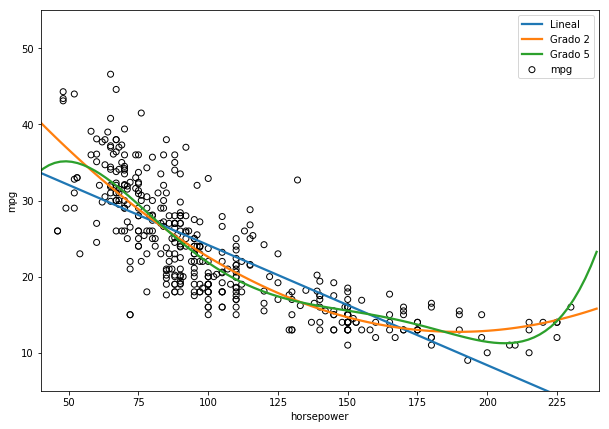

In [456]:
# Utilizando la función regplot()  de Seaborn, facilmente podemos gráficar polinomios de alto grado.
import seaborn as sns
plt.figure(figsize=(10, 7), dpi=72)
plt.scatter(datosAutos['horsepower'], datosAutos['mpg'], facecolors='None', edgecolors='k') 
sns.regplot(datosAutos.horsepower, datosAutos.mpg, ci=None, label='Lineal', scatter=False)
sns.regplot(datosAutos.horsepower, datosAutos.mpg, ci=None, label='Grado 2', order=2, scatter=False)
sns.regplot(datosAutos.horsepower, datosAutos.mpg, ci=None, label='Grado 5', order=5, scatter=False)
plt.legend()
plt.ylim(5,55)
plt.xlim(40,240);

Por lo tanto, podemos utilizar cualquier software de regresión lineal estándar para estimar $\beta_0$, $\beta_1$ y $\beta_2$ con el fin de producir un ajuste no lineal. La curva azul en la figura muestra el ajuste cuadrático a los datos resultante. El _ajuste cuadrático_ parece ser sustancialmente mejor que el ajuste obtenido cuando sólo se incluye el término lineal. El $R^2$ del ajuste cuadrático es 0.688, en comparación con 0.606 para el ajuste lineal, y el p-valor en la siguiente tabla para el término cuadrático es muy significativo.

In [457]:
est1 = smf.ols('mpg ~ horsepower', datosAutos).fit()
regr1 = est1.params

datosAutos['horsepower2'] = datosAutos.horsepower**2
datosAutos.head(3)

est2 = smf.ols('mpg ~ horsepower + horsepower2', datosAutos).fit()
regr2 = est2.params

print('Regresión 1 - sin terminos interacutando')
print(regr1)
print('\nRegresion 2 - con interacción de terminos')
print(regr2)

Regresión 1 - sin terminos interacutando
Intercept     39.935861
horsepower    -0.157845
dtype: float64

Regresion 2 - con interacción de terminos
Intercept      56.900100
horsepower     -0.466190
horsepower2     0.001231
dtype: float64


In [433]:
est2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,56.4201,1.849,30.517,0.000,52.785,60.055
horsepower,-0.4558,0.032,-14.282,0.000,-0.519,-0.393
horsepower2,0.0012,0.000,9.501,0.000,0.001,0.001


Si la inclusión de $horsepower^2$ produjo a una gran mejora en el modelo, ¿por qué no incluir $horsepower^3$, $horsepower^4$, o incluso caballos de fuerza5 o $horsepower^5$? La curva verde de la figura anterior muestra el ajuste que resulta de incluir todos los polinomios hasta el quinto grado en el modelo. El ajuste resultante parece innecesariamente ondulado, es decir, no está claro que la inclusión de los términos adicionales realmente conduzca a un mejor ajuste a los datos.

La aproximación que acabamos de describir para extender el modelo lineal para acomodar relaciones no lineales se conoce como _regresión polinomial_, ya que hemos incluido funciones polinomiales de los predictores en el modelo de regresión.

## Problemas potenciales

Cuando ajustamos un modelo de regresión lineal a un determinado conjunto de datos, pueden surgir muchos problemas. Los más comunes entre estos son los siguientes:

1. No linealidad de las relaciones respuesta-predictor.
2. Correlación de los términos de error.
3. Variación no constante de los términos de error. 
4. Valores atípicos.
5. Puntos de alto leverage (influencia o apalancamiento).
6. Colinealidad.

En la práctica, identificar y superar estos problemas es tanto un arte como una ciencia. En la literatura se ha escrito mucho sobre este tema. Se mostrará sólo un breve resumen de algunos puntos clave.


### 1. No linealidad de los datos

El modelo de regresión lineal asume que existe una relación lineal entre los predictores y la respuesta. Si la verdadera relación está lejos de ser lineal, casi todas las conclusiones que extraemos del ajuste son sospechosas. Además, la precisión de predicción del modelo puede reducirse significativamente.

_**Los gráficos de residuales son una herramienta gráfica muy útil para identificar la no linealidad**_. Dado un modelo de regresión lineal simple, podemos graficar los residuos, $e_i = y_i - \hat y_i$ , contra el predictor $x_i$. En el caso de un modelo de regresión múltiple puesto que hay múltiples predictores, en su lugar podemos graficar los residuos contra los valores predichos (o ajustados) $\hat y_i$ . Idealmente, el gráfico residual no mostrará ningún patrón distinguible. La presencia de un patrón puede indicar un problema con algún aspecto del modelo lineal.

El panel izquierdo de la siguiente figura muestra un gráfico residual de la regresión lineal de **mpg** sobre caballos de fuerza (**horsepower**) en el conjunto de datos **Auto** que se ilustró en la figura anterior. La línea roja es un ajuste suave a los residuos, que se muestra con el fin de facilitar la identificación de alguna tendencia. _Los residuos presentan una clara forma de U, lo que proporciona una fuerte indicación de no linealidad en los datos_. Por el contrario, el panel derecho de la siguiente figura muestra el gráfico residual que resulta del modelo anterior que contiene un término cuadrático. El patrón anterior en los residuos prácticamente desaparece, lo que sugiere que el término cuadrático mejora el ajuste a los datos.

In [437]:
regr = skl_lm.LinearRegression()
# Linear fit
X = datosAutos.horsepower.values.reshape(-1,1)
y = datosAutos.mpg
regr.fit(X, y)
datosAutos['pred1'] = regr.predict(X)
datosAutos['resid1'] = datosAutos.mpg - datosAutos.pred1

# Quadratic fit
X2 = datosAutos[['horsepower', 'horsepower2']].as_matrix()
regr.fit(X2, y)
datosAutos['pred2'] = regr.predict(X2)
datosAutos['resid2'] = datosAutos.mpg - datosAutos.pred2

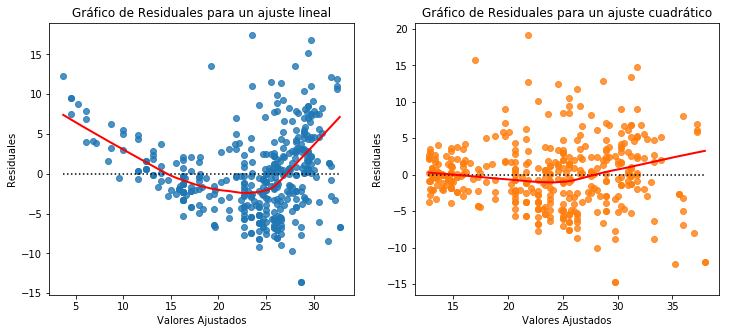

In [440]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot
sns.regplot(datosAutos.pred1, datosAutos.resid1, lowess=True, ax=ax1, line_kws={'color':'r', 'lw':2})
ax1.hlines(0,xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dotted')
ax1.set_title('Gráfico de Residuales para un ajuste lineal')

# Right plot
sns.regplot(datosAutos.pred2, datosAutos.resid2, lowess=True, line_kws={'color':'r', 'lw':2}, ax=ax2)
ax2.hlines(0,xmin=ax2.xaxis.get_data_interval()[0],
           xmax=ax2.xaxis.get_data_interval()[1], linestyles='dotted')
ax2.set_title('Gráfico de Residuales para un ajuste cuadrático')

for ax in fig.axes:
    ax.set_xlabel('Valores Ajustados')
    ax.set_ylabel('Residuales')

Si la gráfica residual indica que hay asociaciones no lineales en los datos, entonces una aproximación simple es utilizar transformaciones no lineales de los predictores, tales
como $\log{X} , \sqrt{X}$  y $X^2$ , en el modelo de regresión.

### 2. Correlación de los términos de error

Un supuesto importante del modelo de regresión lineal es que los términos de error, 𝜖1, 𝜖2,. . . , 𝜖𝑛, no están correlacionados. ¿Qué significa esto? Por ejemplo, si los errores no están correlacionados, entonces el hecho de que 𝜖𝑖 sea positivo proporciona poca o ninguna información sobre el signo de 𝜖𝑖+1. Los errores estándar que se calculan para los coeficientes de regresión estimados o para los valores ajustados se basan en la suposición de términos de error no correlacionados. Si de hecho hay correlación entre los términos de error, entonces los errores estándar estimados tenderán a _subestimar los verdaderos errores estándar_. Como resultado, los intervalos de confianza y predicción serán más estrechos de lo que deberían ser.

Por ejemplo, un intervalo de confianza del 95% puede, en realidad, tener una probabilidad mucho menor que 0.95 de contener el verdadero valor del parámetro. Además, los p-valores asociados con el modelo serán más bajos de lo que deberían ser; esto podría hacernos concluir erróneamente que un parámetro es estadísticamente significativo. En resumen, si los términos de error están correlacionados, no podemos tener confianza en nuestro modelo.

Como un ejemplo extremo, supongamos que duplicamos accidentalmente nuestros datos, dando lugar a observaciones y términos de error idénticos en parejas. Si ignoramos esto, en los cálculos del error estándar parecería como si tuviéramos una muestra de tamaño 2n, cuando de hecho sólo tenemos n observaciones. Los parámetros estimados serían los mismos para los 2n datos como para las n observaciones, pero los intervalos de confianza
serían más estrechos por un factor de $\sqrt{2!}$.

**¿Por qué pueden ocurrir correlaciones entre los términos de error?** Tales correlaciones ocurren con frecuencia en el contexto de **_datos de series temporales_**, que consisten en observaciones para las cuales se obtienen mediciones en puntos discretos en el tiempo. En muchos casos, las observaciones que se obtienen en puntos de tiempo adyacentes tendrán errores correlacionados positivamente. Con el fin de determinar si este es el caso en un conjunto de datos dado, podemos graficar los residuos del modelo en función del tiempo. Si los errores no están correlacionados, entonces no debería haber ningún patrón distinguible.

Por otra parte, si los términos de error están correlacionados positivamente, entonces podemos ver un _seguimiento_ en los residuos, es decir, los residuos adyacentes pueden tener valores similares. La siguiente figura proporciona una ilustración. En el panel superior, vemos los residuos de un ajuste de regresión lineal a los datos generados con errores no correlacionados. No hay evidencia de una tendencia relacionada con el tiempo en los residuos. Por el contrario, los residuos en el panel inferior pertenecen a un conjunto de datos en el que los errores adyacentes tenían una correlación de 0.9. Ahora existe un patrón claro en los residuales, los residuos adyacentes tienden a tomar valores similares. Finalmente, el panel central ilustra un caso más moderado en el que los residuos tenían una correlación de 0.5. Todavía hay evidencia de seguimiento, pero el patrón es menos claro.

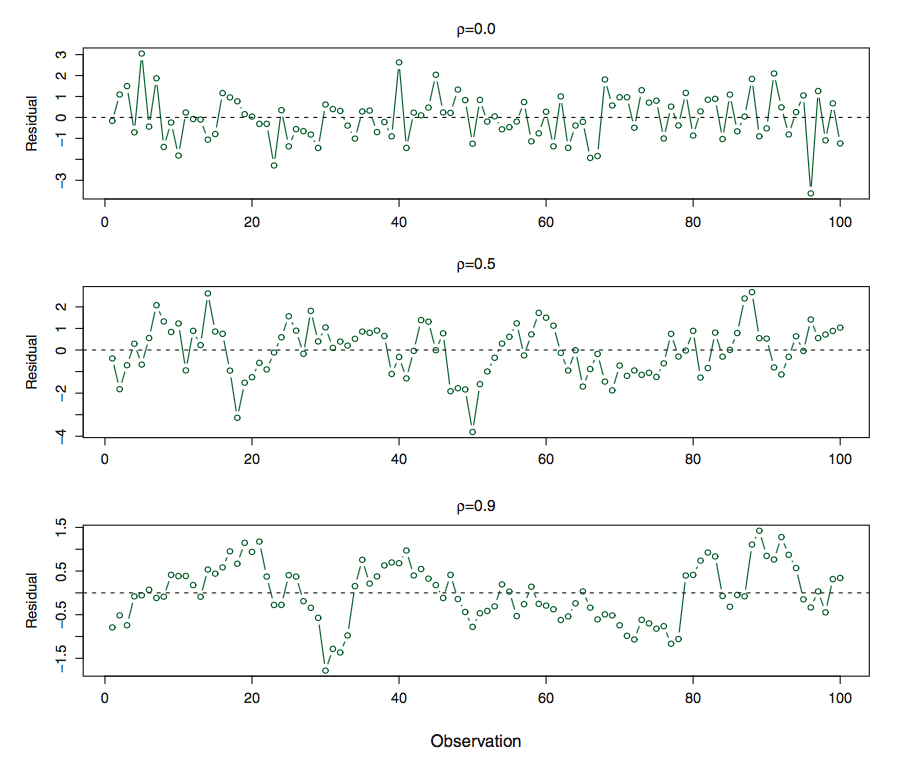

Se han desarrollado muchos métodos para tener debidamente en cuenta las correlaciones en los términos de error en los datos de series de tiempo. La correlación entre los términos de error también puede ocurrir en datos que no son series de tiempo. Por ejemplo, considere un estudio en el cual se quiere predecir las estaturas de los individuos por medio de sus pesos. La suposición de errores no correlacionados podría ser violada si algunos de los individuos en el estudio son miembros de la misma familia, o comen la misma dieta, o han estado expuestos a los mismos factores ambientales. En general, la suposición de errores no correlacionados es extremadamente importante para la regresión lineal, así como para otros métodos estadísticos, y un buen diseño experimental es crucial para mitigar el riesgo de tales correlaciones.

### 3. Variación no constante de los términos de error

Otra hipótesis importante del modelo de regresión lineal es que los términos de error tienen una varianza constante, $Var(\epsilon_i) = \sigma^2$. Los errores estándar, los intervalos de confianza y las pruebas de hipótesis asociadas con el modelo lineal se basan en este supuesto.

Desafortunadamente, es frecuente que las variaciones de los términos de error no sean constantes. Por ejemplo, las variaciones de los términos de error pueden aumentar con el valor de la respuesta. Se puede identificar variaciones no constantes en los errores, o _**heterocedasticidad**_, por la presencia de una _forma de embudo_ en el gráfico residual. Un ejemplo se muestra en el panel izquierdo de la siguiente figura, en el que la magnitud de los residuos tiende a aumentar con los valores ajustados. Cuando se enfrenta a este problema, una posible solución es transformar la respuesta $Y$ usando una transformación cóncava tal como $\log{Y}$ o $\sqrt{Y}$.

Dicha transformación resulta en una mayor cantidad de contracción de las respuestas mayores, dando lugar a una _reducción de la heterocedasticidad_. El panel derecho de la figura muestra el gráfico residual después de transformar la respuesta usando $\log{Y}$. Los residuos ahora parecen tener una varianza constante, aunque hay alguna evidencia de una ligera relación no lineal en los datos.

![residuales vs valores ajustados](./assets/residualsvsfitvalues.png)

### Gráficos similares a la salida de R

Source: https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034

Usualmente en R podemos graficar rapidamente los datos de tal forma que encontremos diferentes patrones en los datos y nos ayuden a tomar el camino mas adecuado. Un ejemplo del código en R y la salida se muestra a continuación:

``` R
model = lm(mpg ~ . - name, data=Auto)
par(mfrow=c(2,2)) # Plot 4 plots in same screen
plot(model)
```

![plot en R](./assets/Rplot.png)


In [458]:
# Cargamos las librerías necesarias
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot

plt.style.use('seaborn') # para hacer los gráficos de matplotlib mas agradables
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

# Ajustamos el modelo lineal completo utilizando los datos de la tabla Auto
model_f = 'mpg ~ cylinders + displacement + horsepower + \
                 weight + acceleration + year + \
                 origin'

model = smf.ols(formula=model_f, data=datosAutos)
model_fit = model.fit()

# Realizamos algunos cálculos requeridos para algunas de las gráficas a visualizar
model_fitted_y = model_fit.fittedvalues # Valores Ajustados (necesita un termino constante para el intercepto)
model_residuals = model_fit.resid # residuales del modelo
model_norm_residuals = model_fit.get_influence().resid_studentized_internal # residuales normalizados
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals)) # residuales absolutos normalizados al cuadrado
model_abs_resid = np.abs(model_residuals) # residuales absolutos
model_leverage = model_fit.get_influence().hat_matrix_diag # leverage o influencia
model_cooks = model_fit.get_influence().cooks_distance[0] # distancia de cook


### Gráfico de Residuales

El primer gráfico generado por R es el de **Residuales**, el cual dibuja un grafico de dispersión de los valores ajustados contra los residuales, con una línea de regresión ajustada y suavizada para mostrsr cualquier tendencia aparente.

Esto resulta facil utilizando la funcion residplot de la librería seaborn, con los valores ajustados como el parametro $X$ y la variable dependiente como $Y$. _lowess=True_ sígnifica que dibuje la línea de regresión ajustada. Adicionalmente los parametros _scatter_kws_ y _line_kws_ son enviados a la librería matplotlib utilizando las funciones de dispersión y lineal; al igual que los titulos y las etiquetas son dibujados utilizando los metodos de la librería matplotlib. El punto y coma al final de la instruccion es para evitar la salida del texto <matplotlib.text.Text at 0x000000000> al comienzo de la gráfica. Los 3 valores mas altos de residuales absolutos tambien son anotados o resaltados en el gráfico.

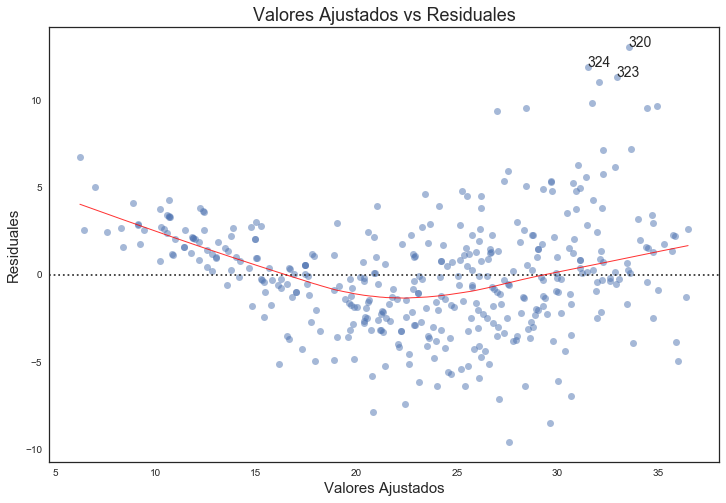

In [472]:
plt.style.use('seaborn-white')
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'mpg', data=datosAutos, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Valores Ajustados vs Residuales')
plot_lm_1.axes[0].set_xlabel('Valores Ajustados')
plot_lm_1.axes[0].set_ylabel('Residuales')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));

### Gráfico de Cuantiles - QQ

El gráfico muestra cuan bien se ajusta la distribucción de los residuales a la distribución normal. Esto grafica los residuales estandarizados (z-score) contra los cuantiles normales teóricos. Cualquier punto que cae fuera de la línea diagonal debe considerarse para posterior investigaciones.

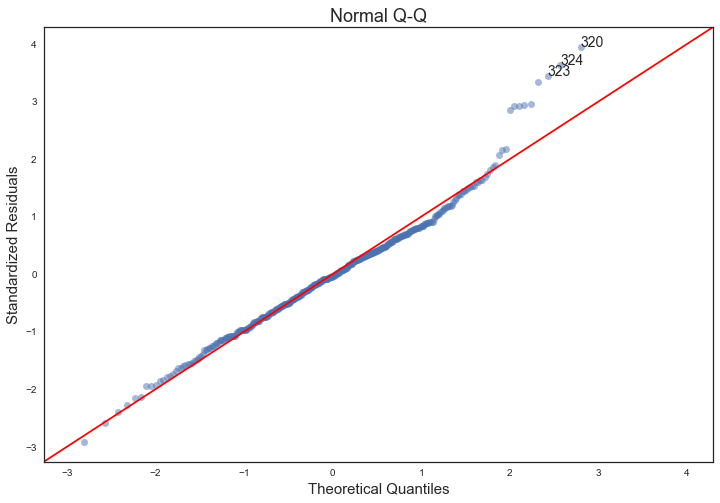

In [473]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, xy=(np.flip(QQ.theoretical_quantiles, 0)[r], model_norm_residuals[i]));

### Gráfico de Escala - Localización

Esta es otra gráfica de residuales, los cual muestra dispersion de los datos de forma que se pueda medir la heteroscedasticidad.

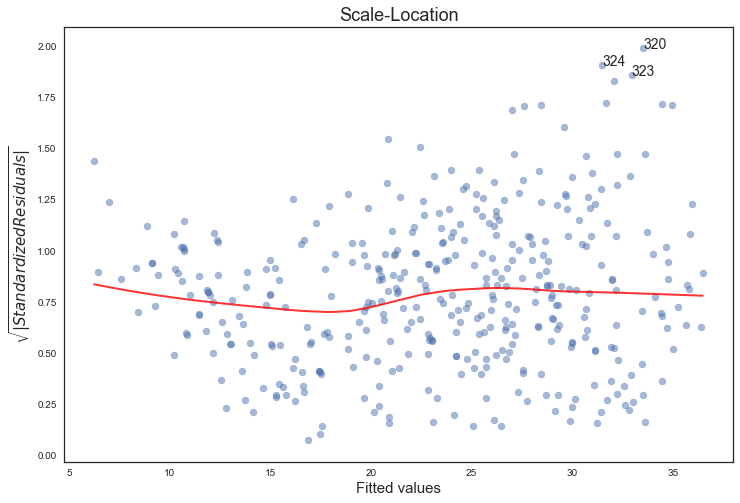

In [474]:
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, ci=False, lowess=True,
            line_kws={'color': 'red', 'lw': 2, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, xy=(model_fitted_y[i], model_norm_residuals_abs_sqrt[i]));

### Gráfico de influencias o apalancamiento - Leverage

Este gráfico muestra si algún valor atípico o outlier tiene influencia sobre el ajuste de regresión. Cualquier punto fuera del grupo o fuera de las líneas de "_distancia de Cook_", podrían tener efectos influenciables en el ajuste del modelo.


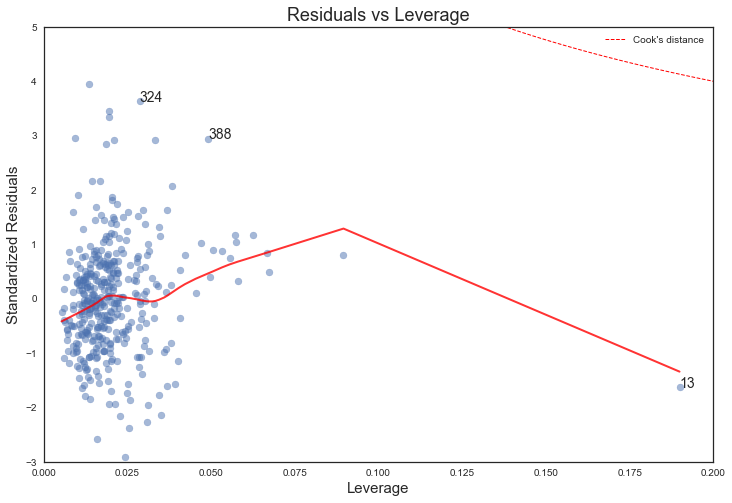

In [475]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, ci=False, lowess=True,
            line_kws={'color': 'red', 'lw': 2, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, xy=(model_leverage[i], model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(model_fit.params) # number of model parameters
graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), np.linspace(0.001, 0.200, 50), 'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), np.linspace(0.001, 0.200, 50)) # 1 line
plt.legend(loc='upper right');

En algunos casos se puede tener una idea de cómo es la varianza de cada respuesta. Por ejemplo, la i-ésima respuesta podría ser un promedio de $n_i$ observaciones originales. Si cada una de estas observaciones originales no está correlacionada y tiene varianza $\sigma^2$, entonces su promedio tiene una varianza $\sigma_i^2 = \sigma^2 / n$. En este caso, un remedio simple es ajustar nuestro modelo por **_mínimos cuadrados ponderados**_, con pesos proporcionales a las varianzas inversas, es decir,  $w_i = n_i$ , en este caso. La mayoría del software de regresión lineal permite estas ponderaciones en las observaciones.

### 4. Valores atípicos

Un _valor atípico_ (**outlier**) es un punto para el cual $y_i$ está lejos del valor predicho por el modelo. Los valores atípicos pueden surgir por una variedad de razones, tales como el registro incorrecto de una observación durante la recolección de los datos.

El punto rojo (observación 20) en el panel izquierdo de la siguiente figura ilustra un valor atípico. La línea sólida roja es el ajuste de regresión de mínimos cuadrados, mientras que la línea azul discontinua es el ajuste de mínimos cuadrados después de la eliminación del valor atípico. En este caso, la remoción del valor atípico tiene poco efecto en la recta de mínimos cuadrados: no se produce casi ningún cambio en la pendiente, y hay una reducción minúscula en el intercepto.

![Outliers](./assets/Outliers2.png)

Es frecuente que un valor atípico que no tiene un valor inusual en el predictor, tenga poco efecto en el ajuste de mínimos cuadrados. Sin embargo, si un valor atípico no tiene mucho efecto en el ajuste de mínimos cuadrados, puede causar otros problemas. Por ejemplo, en el ejemplo, el RSE es 1.09 cuando el valor atípico se incluye en la regresión, pero es sólo 0.77 cuando se elimina el valor atípico. 

Dado que el RSE se utiliza para calcular todos los intervalos de confianza y los p-valores, un aumento tan dramático causado por un único punto de datos puede tener implicaciones para la interpretación del ajuste. De forma similar, la inclusión del valor atípico hace que el $R^2$ disminuya de 0,892 a 0,805.

Los gráficos de residuales se pueden utilizar para identificar los valores atípicos. En este ejemplo, el outlier es claramente visible en el gráfico residual del panel central de la figura. Pero en la práctica, puede ser difícil decidir cuán grande debe ser un residuo antes de considerar el punto como un valor atípico. Para resolver este problema, en lugar de graficar los residuos, podemos graficar los _**residuos estudentizados**_, los cuales se calculan dividiendo cada residual $e_i$ por su error estándar estimado. _**Las observaciones cuyos residuos estudentizados son mayores que 3 en valor absoluto son posibles valores atípicos**_. En el panel derecho de la figura, el residuo estudentizado del outlier es mayor que 6, mientras que para todas las demás observaciones los residuales estudentizados caen entre -2 y 2.

Si un valor atípico es debido a un error en la recolección o registro de datos, entonces una solución es simplemente eliminar la observación. Sin embargo, se debe tener cuidado, ya que un valor atípico puede indicar una deficiencia en el modelo, como la falta de un predictor.

### 5. Puntos de alta influncia o apalancamiento - Leverage

Acabamos de ver que los valores atípicos son observaciones para las cuales la respuesta $y_i$ es inusual dado el predictor $x_i$. En contraste, las observaciones con alto leverage (apalancamiento) tienen un valor inusual para $x_i$. Por ejemplo, la observación 41 en el panel izquierdo de la siguiente figura tiene un alto grado de leverage, ya que el valor predictor para esta observación es grande con respecto a las otras observaciones. (Obsérvese que los datos que se muestran son los mismos que los mostrados en la figura anterior, pero con la adición de una sola observación de alto leverage). La línea sólida roja es el ajuste por mínimos cuadrados de los datos, mientras que la línea azul discontinua es el ajuste producido cuando se retira la observación 41.

![Leverage](./assets/Leverage.png)

Comparando los paneles de la izquierda de ambas figuras, observamos que eliminar la observación de alto leverage tiene un impacto mucho más sustancial en la línea de mínimos cuadrados que la eliminación del valor atípico. De hecho, las observaciones de alto leverage tienden a tener un impacto considerable en la recta de regresión estimada. Es preocupante que la recta de mínimos cuadrados esté fuertemente afectada por sólo un par de observaciones, ya que cualquier problema con estos puntos puede invalidar todo el ajuste. Por esta razón, es importante identificar observaciones de alto leverage.

En una regresión lineal simple, las observaciones de alto leverage son bastante fáciles de identificar, ya que simplemente podemos buscar observaciones para las cuales el valor del predictor está fuera del rango normal de las observaciones de $X$. Pero en una regresión lineal múltiple con muchos predictores, es posible tener una observación que esté bien dentro del rango de los valores de cada predictor individual, pero que es inusual en términos del conjunto completo de predictores. Un ejemplo se muestra en el panel central de la figura, para un conjunto de datos con dos predictores, $X_1$ y $X_2$. La mayoría de los valores de predicción de las observaciones caen dentro de la elipse de rayas azules, pero la observación roja está bien afuera de este rango. Pero ni su valor para $X_1$ ni su valor para $X_2$ es inusual. Así que si examinamos sólo $X_1$ o simplemente $X_2$, no notaremos este punto de alto leverage. Este problema es más pronunciado en regresiones múltiples con más de dos predictores, porque no hay una manera simple de gráficar todas las dimensiones de los datos simultáneamente.

Para cuantificar el leverage de una observación, se calcula el estadístico de leverage. Un gran valor de este estadístico indica una observación con alto leverage. Para una regresión lineal simple,

$$ h_i = \frac{1}{n} + \frac{ (x_i - \bar x)^2 }{ \sum_{i'=1}^n (x_{i'} - \bar x)^2 }$$

De esta ecuación se desprende que $h_i$ aumenta con la distancia $x_i$ a $\bar x$. Hay una extensión simple de $h_i$ al caso de los predictores múltiples, _aunque no proporcionamos la fórmula aquí_. El estadístico de leverage $h_i$ está siempre entre 1/n y 1, y el leverage promedio para todas las observaciones es siempre igual a (p+1)/n. Por lo tanto, si una observación dada tiene un estadístico de leverage que excede en gran medida (p+1)/n, entonces podemos sospechar que el punto correspondiente tiene un alto apalancamiento.

El panel derecho de la figura proporciona una gráfica de los _**residuos estudentizados**_ versus $h_i$ para los datos en el panel izquierdo de la figura. La observación 41 se destaca con un estadístico de leverage muy alto, así como un alto residuo estudentizado. En otras palabras, es una observación atípica, así como una observación de alto leverage. _**Esta es una combinación particularmente peligrosa!**_ Esta gráfica también revela la razón por la que la observación 20 tuvo relativamente poco efecto sobre el ajuste de mínimos cuadrados en la figura de los outliers, tiene un bajo nivel de leverage.

### 6. Colinealidad

La _colinealidad_ se refiere a la situación en la cual dos o más variables predictoras están estrechamente relacionadas entre sí. El concepto de colinealidad se ilustra en la siguiente figura utilizando el conjunto de datos de Default. En el panel izquierdo de la figura, los predictores **límite** (de crédito) y **edad** parecen no tener una relación obvia. Por el contrario, en el panel de la derecha de la figura, los predictores **límite** y **calificación** (crediticia) están muy correlacionados entre sí, y decimos que son colineales. La presencia de colinealidad puede llegar a crear problemas en el contexto de regresión, ya que puede ser difícil separar los efectos individuales de las variables colineales sobre la variable respuesta.

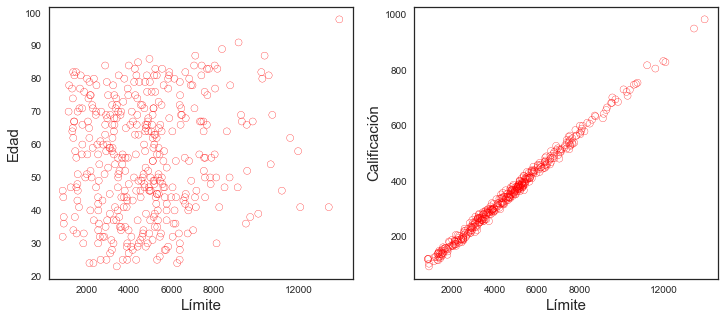

In [476]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot
ax1.scatter(datosCredito.Limit, datosCredito.Age, facecolor='None', edgecolor='r')
ax1.set_ylabel('Edad')

# Right plot
ax2.scatter(datosCredito.Limit, datosCredito.Rating, facecolor='None', edgecolor='r')
ax2.set_ylabel('Calificación')

for ax in fig.axes:
    ax.set_xlabel('Límite')
    ax.set_xticks([2000,4000,6000,8000,12000])

En otras palabras, dado que límite y calificación tienden a aumentar o disminuir juntos, puede ser difícil determinar cómo cada uno está asociado por separado con la respuesta, **saldo**. La siguiente figura ilustra algunas de las dificultades que puede producir la colinealidad. El panel izquierdo de la figura es un diagrama de contorno del RSS asociado con diferentes estimaciones posibles de los coeficientes para la regresión del saldo sobre el límite y la edad. Cada elipse representa un conjunto de coeficientes que corresponden al mismo RSS, para las elipses más cercanas al centro la RSS toma los valores más bajos. Los puntos negros y las líneas discontinuas asociadas representan las estimaciones de los coeficientes que dan como resultado la RSS más pequeña posible; en otras palabras, éstas son las estimaciones de mínimos cuadrados.

Los ejes para los predictores límite y edad se han escalado de modo que la gráfica incluya las estimaciones posibles del coeficiente que son hasta cuatro errores estándar en cualquier lado de las estimaciones de los mínimos cuadrados. De esta manera, la gráfica incluye todos los valores plausibles para los coeficientes. Por ejemplo, vemos que el verdadero coeficiente de límite es casi seguramente un valor entre 0,15 y 0,20.

En contraste, el panel derecho de la figura muestra gráficas de contorno del RSS asociadas con posibles estimaciones de coeficientes para la regresión del saldo sobre el límite y la calificación, que sabemos que son altamente colineales. Ahora los contornos recorren una estrecha región; existe una amplia gama de valores para las estimaciones de coeficientes que resultan en valores iguales para RSS.

Por lo tanto, un pequeño cambio en los datos podría hacer que el par de valores de coeficientes que producen el RSS más pequeño -es decir, las estimaciones de mínimos cuadrados- se mueva a cualquier parte a lo largo de esta zona. Esto da lugar a una gran incertidumbre en las estimaciones de los coeficientes. Obsérvese que la escala para el coeficiente de límite ahora es de aproximadamente -0.2 a 0.2; Esto es un aumento de ocho veces sobre el rango plausible del coeficiente de límite en la regresión con la edad. Curiosamente, a pesar de que los coeficientes de límite y calificación ahora tienen mucha más incertidumbre individual, seguramente se encontrarán en alguna parte en esta región del contorno. Por ejemplo, no esperaríamos que el valor real de los coeficientes de límite y de calificación sea -0.1 y 1 respectivamente, aun cuando tal valor sea plausible para cada coeficiente individualmente.


In [478]:
from sklearn.preprocessing import scale
y = datosCredito.Balance

# Regression for left plot
X = datosCredito[['Age', 'Limit']].as_matrix()
regr1 = skl_lm.LinearRegression()
regr1.fit(scale(X.astype('float'), with_std=False), y)
print('Age/Limit\n',regr1.intercept_)
print(regr1.coef_)

# Regression for right plot
X2 = datosCredito[['Rating', 'Limit']].as_matrix()
regr2 = skl_lm.LinearRegression()
regr2.fit(scale(X2.astype('float'), with_std=False), y)
print('\nRating/Limit\n',regr2.intercept_)
print(regr2.coef_)

Age/Limit
 520.015
[-2.29148553  0.17336497]

Rating/Limit
 520.015
[ 2.20167217  0.02451438]


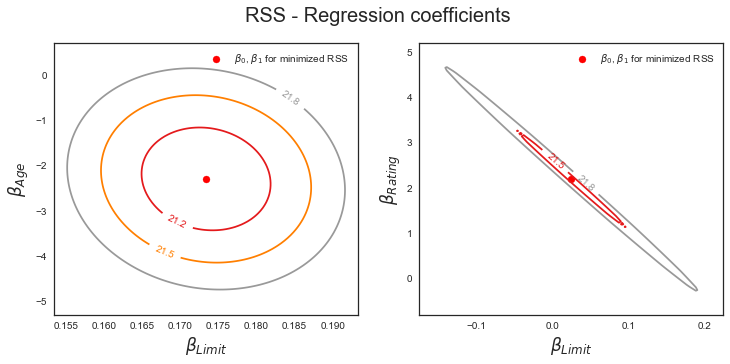

In [480]:
# Crear malla de coordenadas
B_Age = np.linspace(regr1.coef_[0]-3, regr1.coef_[0]+3, 100)
B_Limit = np.linspace(regr1.coef_[1]-0.02, regr1.coef_[1]+0.02, 100)

B_Rating = np.linspace(regr2.coef_[0]-3, regr2.coef_[0]+3, 100)
B_Limit2 = np.linspace(regr2.coef_[1]-0.2, regr2.coef_[1]+0.2, 100)

X1, Y1 = np.meshgrid(B_Limit, B_Age, indexing='xy')
X2, Y2 = np.meshgrid(B_Limit2, B_Rating, indexing='xy')
Z1 = np.zeros((B_Age.size,B_Limit.size))
Z2 = np.zeros((B_Rating.size,B_Limit2.size))

Limit_scaled = scale(datosCredito.Limit.astype('float'), with_std=False)
Age_scaled = scale(datosCredito.Age.astype('float'), with_std=False)
Rating_scaled = scale(datosCredito.Rating.astype('float'), with_std=False)

# Cálcular valores Z (RSS) basados en la malla de coeficientes
for (i,j),v in np.ndenumerate(Z1):
    Z1[i,j] =((y - (regr1.intercept_ + X1[i,j]*Limit_scaled + Y1[i,j]*Age_scaled))**2).sum()/1000000
    
for (i,j),v in np.ndenumerate(Z2):
    Z2[i,j] =((y - (regr2.intercept_ + X2[i,j]*Limit_scaled + Y2[i,j]*Rating_scaled))**2).sum()/1000000
    
fig = plt.figure(figsize=(12,5))
fig.suptitle('RSS - Regression coefficients', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
    
# Left plot
CS = ax1.contour(X1, Y1, Z1, cmap=plt.cm.Set1, levels=[21.25, 21.5, 21.8])
ax1.scatter(regr1.coef_[1], regr1.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')
ax1.set_ylabel(r'$\beta_{Age}$', fontsize=17)

# Right plot
CS = ax2.contour(X2, Y2, Z2, cmap=plt.cm.Set1, levels=[21.5, 21.8])
ax2.scatter(regr2.coef_[1], regr2.coef_[0], c='r', label=min_RSS)
ax2.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')
ax2.set_ylabel(r'$\beta_{Rating}$', fontsize=17)
ax2.set_xticks([-0.1, 0, 0.1, 0.2])

for ax in fig.axes:
    ax.set_xlabel(r'$\beta_{Limit}$', fontsize=17)
    ax.legend()

Dado que la colinealidad reduce la precisión de las estimaciones de los coeficientes de regresión, hace que el error estándar para  $\hat \beta_j$ crezca. Recordemos que el estadístico t para cada predictor se calcula dividiendo  $\hat \beta_j$  por su error estándar. En consecuencia, la colinealidad produce una _disminución en el estadístico t_. Como resultado, en presencia de colinealidad, podemos no rechazar $H_0$: $\beta_j=0$. Esto significa que la potencia de la prueba de hipótesis, es decir, la probabilidad de detectar correctamente un coeficiente no nulo, se reduce por la colinealidad.

La siguiente tabla compara las estimaciones de los coeficientes obtenidas en dos modelos de regresión múltiple separados. El primero es una regresión del saldo sobre edad y límite, y el segundo es una regresión del saldo sobre calificación y límite.

In [495]:
reg1 = smf.ols('Balance ~ Age + Limit', datosCredito).fit() # Model 1
reg2 = smf.ols('Balance ~ Rating + Limit', datosCredito).fit() # Model 2
print(reg1.summary().tables[1])
print(reg2.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -173.4109     43.828     -3.957      0.000    -259.576     -87.246
Age           -2.2915      0.672     -3.407      0.001      -3.614      -0.969
Limit          0.1734      0.005     34.496      0.000       0.163       0.183
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -377.5368     45.254     -8.343      0.000    -466.505    -288.569
Rating         2.2017      0.952      2.312      0.021       0.330       4.074
Limit          0.0245      0.064      0.384      0.701      -0.101       0.150


En la primera regresión, tanto la edad como el límite son muy significativos con p-valores muy pequeños. En el segundo, la colinealidad entre límite y calificación ha provocado que el error estándar para la estimación del coeficiente límite aumentara en un factor de 12 y el p-valor aumentara a 0.701. En otras palabras, la importancia de la variable límite ha sido enmascarada debido a la presencia de colinealidad.

Para evitar tal situación, es deseable identificar y abordar posibles problemas de colinealidad mientras se ajusta al modelo. _**Una manera simple de detectar colinealidad es mirar la matriz de correlación de los predictores**_. Un elemento de esta matriz que es grande en valor absoluto indica un par de variables altamente correlacionadas, y por lo tanto un problema de colinealidad en los datos. _Desafortunadamente, no todos los problemas de colinealidad pueden ser detectados mediante la inspección de la matriz de correlación_: es posible que exista una colinealidad entre tres o más variables incluso si ningún par de variables tiene una correlación particularmente alta. Llamamos a esta situación _multicolinealidad_.

### Fáctor de inflación de la varianza - VIF

En lugar de inspeccionar la matriz de correlación, _**una forma mejor de evaluar la multicolinealidad**_ es calcular el **factor de inflación de la varianza (VIF)**. El valor más pequeño posible para el VIF es 1, lo que indica la ausencia total de colinealidad. Típicamente en la práctica hay una pequeña cantidad de colinealidad entre los predictores. _Como regla general, un valor **VIF que excede de 5 o 10** indica una cantidad problemática de colinealidad_. El VIF para cada variable se puede calcular usando la fórmula:

$$ VIF(\hat \beta_j) = \frac{1}{(1 - R_{X_j | X_-j}^2)} $$


donde $R_{X_j | X_-j}^2$ es el $R^2$ de una regresión de $X_j$ sobre los demás predictores. Si $R_{X_j | X_-j}^2$ es cercano a 1, la colinealidad está presente , y el VIF será grande.

En los datos de crédito, una regresión del saldo sobre edad, calificación y límite indica que los predictores tienen valores de VIF de 1,01, 160,67 y 160,59. Como sospechábamos, ¡hay una considerable colinealidad en los datos!

In [518]:
est_Age = smf.ols('Age ~ Rating + Limit', datosCredito).fit()
est_Rating = smf.ols('Rating ~ Age + Limit', datosCredito).fit()
est_Limit = smf.ols('Limit ~ Age + Rating', datosCredito).fit()

print(1/(1-est_Age.rsquared))
print(1/(1-est_Rating.rsquared))
print(1/(1-est_Limit.rsquared))

1.01138468607
160.668300959
160.592879786


Cuando se enfrenta al problema de la colinealidad, existen dos soluciones simples. La primera es eliminar una de las variables problemáticas de la regresión. Normalmente esto puede hacerse sin mucho compromiso con el ajuste de regresión, ya que la presencia de la colinealidad implica que la información que esta variable proporciona sobre la respuesta es redundante en presencia de las otras variables. Por ejemplo, si se regresa el saldo sobre la edad y el límite, sin el predictor calificación, entonces los valores de VIF resultantes se acercan al valor mínimo posible de 1 y el $R^2$ desciende de 0,754 a 0,75. Por lo tanto, la salida de la calificación del conjunto de predictores ha resuelto el problema de la colinealidad sin comprometer el ajuste.

La segunda solución consiste en combinar las variables colineales en un único predictor. Por ejemplo, podríamos tomar el promedio de versiones estandarizadas de límite y calificación para crear una nueva variable que mida la _solvencia crediticia_.

In [515]:
# Es preferible hacerlo de esta manera si se cuentan con muchas variables
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
#import statsmodels.api as sm

# X = datosCredito[['Age','Rating','Limit']] # Para que funcione es necesario una columna con el intercepto y valores 1.0
# y = datosCredito.Balance
#datacopy.head()

# Break into left and right hand side; y and X
y, X = dmatrices("Balance ~ Age + Rating + Limit", data=datosCredito, return_type="dataframe")

# para cada Xi, cálcular VIF y guardarlo en un dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,23.8,Intercept
1,1.0,Age
2,160.7,Rating
3,160.6,Limit


In [517]:
X.head()

,Intercept,Age,Rating,Limit
1,1.0,34.0,283.0,3606.0
2,1.0,82.0,483.0,6645.0
3,1.0,71.0,514.0,7075.0
4,1.0,36.0,681.0,9504.0
5,1.0,68.0,357.0,4897.0


[< Regresión Lineal Simple](Regresion%20Lineal.ipynb) | [Inicio](Aprendizaje%20Estadistico%20y%20Automatico%20con%20Python.ipynb) | [Clasificación >](Clasificacion.ipynb)

Información de soporte adicional en Ingles.

- [Slides de Presentación en PDF](https://lagunita.stanford.edu/c4x/HumanitiesScience/StatLearning/asset/linear_regression.pdf)
- [Multiple Linear Regression and Interpreting Regression Coefficients](https://www.youtube.com/watch?v=1hbCJyM9ccs) (Video - duración 15:38)